# locations

In [2]:
import pandas as pd
import numpy as np
import geocoder
from geopy.geocoders import Nominatim 
import folium

Import File

In [3]:
df_cords = pd.read_excel('Postal_Codes.xlsx',sheet_name = 'IN')

Drop unnecessary columns

In [4]:
df_cords_ws = df_cords.copy()
df_cords_ws.drop(['country_code','accuracy'],axis = 1, inplace = True)
#dff_<city name>.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','latitude','longitude'],axis = 1,inplace = True)

Import City Master

In [5]:
df_city = pd.read_excel('Postal_Codes.xlsx',sheet_name = 'Locations')

In [6]:
df_city.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1, inplace = True)

In [9]:
#checkpoint
df_city_ws = df_city.copy()


df_cords_ws.reset_index(inplace = True)
df_city_ws.reset_index(inplace = True)
df_city_ws.rename(columns = {'Zip Codes':'postal_code'},inplace = True)
df_city_ws.set_index('postal_code',inplace = True)
df_city_ws.drop('index',axis=1,inplace = True)
df_cords_ws.set_index('postal_code',inplace = True)
#filtering only on records which are applicable to the interested cities from the cities master
dff = df_city_ws.join(df_cords_ws, on ='postal_code', how = 'inner')
dff_ws = dff.reset_index()

Breaking the data in to cities

In [11]:
#dff_ahme = dff_ws.loc[dff_ws['City']=='Ahmedabad',:]
#dff_pune = dff_ws.loc[dff_ws['City']=='Pune City',:]
#dff_pmch = dff_ws.loc[dff_ws['City']=='Pimpri-Chinchwad',:]
#dff_viza = dff_ws.loc[dff_ws['City']=='Visakhapatnam ',:]
#dff_bglr = dff_ws.loc[dff_ws['City']=='Bangalore',:]
#dff_kdmc = dff_ws.loc[(dff_ws['City']=='Kalyan') |(dff_ws['City']=='Dombivili')]
#dff_thne = dff_ws.loc[dff_ws['City']=='Thane',:]
dff_ngpr = dff_ws.loc[dff_ws['City']=='Nagpur City',:]

function for resetting the index

In [12]:
def residex(dataframe):
    dataframe = dataframe.reset_index(drop = True)
    return dataframe

In [13]:
#dff_ahme = dff_ahme.apply(residex)
#dff_pune = dff_pune.apply(residex)
#dff_pmch = dff_pmch.apply(residex)
#dff_viza = dff_viza.apply(residex)
#dff_bglr = dff_bglr.apply(residex)
#dff_kdmc = dff_kdmc.apply(residex)
#dff_thne = dff_thne.apply(residex)
dff_ngpr = dff_ngpr.apply(residex)

#function to get cords of the city for maps

In [14]:
def get_cords(city_name):
    address = city_name
    geolocator = Nominatim(user_agent="toronto_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    cords = []
    cords.append(latitude)
    cords.append(longitude)
    return cords

Function to create maps

In [15]:
def map_city(dataframe,location):
    map_city = folium.Map(location, zoom_start = 11)
    # add markers to map
    for lat, lng, post_code, city in zip(dataframe['latitude'], dataframe['longitude'],dataframe['postal_code'],dataframe['City']):
        label = '{}, {}'.format(post_code,city)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_city)  
    return map_city

function to get cords

In [16]:
def osmm(pin_code):
    while True:
        g = geocoder.osm(pin_code)
        a = 0
        if g.json == None:
            a = a+1
            if a >=5:
                print('none')
                return ['NaN','NaN']
                break
            continue
        else:
            print(g.lat,g.lng)
            return [g.lat,'/',g.lng]
            break

In [10]:
1+1

2

In [17]:
dff_pins = dff_<city name>['postal_code'].unique()
dff_pins = pd.DataFrame(dff_pins)
dff_pins = dff_pins.rename(columns={0:'postal_code'})

In [18]:
#columns for new data frame
new_cols = ['postal_code','cords','lat','lng']
dff_pins = dff_pins.reindex(columns = new_cols)

In [ ]:
#loop to extract cords
for pw_city in dff_pins['postal_code']:
    print(dff_pi[dff_pins['postal_code']==pw_city].index)
    dff_pins.iloc[dff_pi[dff_pins['postal_code']==pw_city].index,1] = ''.join(map(str,osmm(pw_city)))

In [ ]:
#to drop indexes if stuck
dff_pins.drop(,axis=0,inplace = True) # index

In [ ]:
#once the cords are obtained moving them to their correct columns and converting them to the correct data type
dff_pins['lat'] = [str(lat).split('/',1)[0] for lat in dff_pins['cords']]
dff_pins['lng'] = [str(lng).split('/')[-1] for lng in dff_pins['cords']]
dff_pins['lng'] = dff_pins['lat'].astype('float64')
dff_pins['lng'] = dff_pins['lng'].astype('float64')

In [ ]:
#creating data frame for dropped pins
dff_pin = pd.DataFrame([[560105 , 12.8529464,77.6245861] ],columns = ['postal_code','lat','lng'])

In [ ]:
#appending it to original DF
dff_pins = dff_pins.append(dff_pin)

To check if the data is properly mapped

In [ ]:
location = get_cords('')
map_city(dff_<city name>,location)

In [ ]:
#joining the pins cords and the city df
dff_<city name> = dff_<city name>.set_index('postal_code').join(dff_pins.set_index('postal_code'),how = 'inner')
dff_<city name>.reset_index(inplace=True)
#dff_<city name>.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','latitude','longitude'],axis = 1,inplace = True)

In [ ]:
dff_<city name> =dff_<city name>.rename(columns = {'lat':'latitude','lng':'longitude'})

writing cords to file

In [ ]:
dff_<city name>.to_csv('Week2/Locations/<city name>.csv')

# Ahmedabad

Creating a seperate dataframe for pin codes of cords

In [91]:
dff_pins = dff_ahme['postal_code'].unique()
dff_pins = pd.DataFrame(dff_pins)
dff_pins = dff_pins.rename(columns={0:'postal_code'})

In [92]:
#columns for new data frame
new_cols = ['postal_code','cords','lat','lng']
dff_pins = dff_pins.reindex(columns = new_cols)
dff_pins['postal_code'].count()

54

In [97]:
#loop to extract cords
for pw_city in dff_pins['postal_code']:
    print(dff_pins[dff_pins['postal_code']==pw_city].index)
    dff_pins.iloc[dff_pins[dff_pins['postal_code']==pw_city].index,1] = ''.join(map(str,osmm(pw_city)))

Int64Index([0], dtype='int64')
23.019811597502404 72.5937202687388
Int64Index([1], dtype='int64')
37.9397841 23.7007214
Int64Index([2], dtype='int64')
23.047662 72.5887797
Int64Index([3], dtype='int64')
23.08374796815393 72.59176848016875
Int64Index([4], dtype='int64')
23.02258365 72.5672491666432
Int64Index([5], dtype='int64')
23.00145525 72.54315232632351
Int64Index([6], dtype='int64')
22.9926102 72.6090279
Int64Index([7], dtype='int64')
23.02427665 72.56991470817002
Int64Index([8], dtype='int64')
23.05555472170645 72.55910814844971
Int64Index([9], dtype='int64')
23.04138361368487 72.5614916343011
Int64Index([10], dtype='int64')
23.012035349999998 72.51300284999999
Int64Index([11], dtype='int64')
23.054546027200253 72.60230013468995
Int64Index([12], dtype='int64')
25.9960675 119.363188
Int64Index([13], dtype='int64')
23.1026007 72.57055785
Int64Index([14], dtype='int64')
23.0298327790184 72.59954236452099
Int64Index([15], dtype='int64')
23.00577272857143 72.59503161428572
Int64Index(

IndexError: positional indexers are out-of-bounds

In [94]:
#identifying which columns is failing
dff_pins.iloc[48,:]

postal_code    382449
cords             NaN
lat               NaN
lng               NaN
Name: 48, dtype: object

In [96]:
#to drop indexes if stuck
dff_pins.drop(50,axis=0,inplace = True) # index 48 382449.0// index 50 382470

In [98]:
dff_pins.head()

,postal_code,cords,lat,lng
0,380001,23.019811597502404/72.5937202687388,NaN,NaN
1,380002,37.9397841/23.7007214,NaN,NaN
2,380004,23.047662/72.5887797,NaN,NaN
3,380005,23.08374796815393/72.59176848016875,NaN,NaN
4,380006,23.02258365/72.5672491666432,NaN,NaN


In [99]:
#once the cords are obtained moving them to their correct columns and converting them to the correct data type
dff_pins['lat'] = [str(lat).split('/',1)[0] for lat in dff_pins['cords']]
dff_pins['lng'] = [str(lng).split('/')[-1] for lng in dff_pins['cords']]
dff_pins['lat'] = dff_pins['lat'].astype('float64')
dff_pins['lng'] = dff_pins['lng'].astype('float64')

In [100]:
dff_pins.head()

,postal_code,cords,lat,lng
0,380001,23.019811597502404/72.5937202687388,23.019812,72.593720
1,380002,37.9397841/23.7007214,37.939784,23.700721
2,380004,23.047662/72.5887797,23.047662,72.588780
3,380005,23.08374796815393/72.59176848016875,23.083748,72.591768
4,380006,23.02258365/72.5672491666432,23.022584,72.567249


In [101]:
#creating data frame for dropped pins
dff_pin = pd.DataFrame([[382470, 23.0584082,72.538713],
                       [382449,23.0104487,72.5987652]],columns = ['postal_code','lat','lng'])

In [102]:
#appending it to original DF
dff_pins = dff_pins.append(dff_pin)

In [105]:
dff_pins.reset_index(inplace=True)
dff_pins[dff_pins['lat'].isna()==True]

,level_0,index,postal_code,cords,lat,lng
48,48,49,382455,NaN,NaN,NaN
50,50,52,382480,NaN,NaN,NaN


In [106]:
dff_pins.loc[dff_pins[dff_pins['postal_code']==382480].index,'lat'] = 23.0554802
dff_pins.loc[dff_pins[dff_pins['postal_code']==382480].index,'lng'] = 72.5775626

In [108]:
#dff_pins.drop(['level_0','index'],axis=1,inplace = True)
dff_pins.drop('cords',axis=1,inplace = True)

dff_pins.head()

,postal_code,lat,lng
0,380001,23.019812,72.593720
1,380002,37.939784,23.700721
2,380004,23.047662,72.588780
3,380005,23.083748,72.591768
4,380006,23.022584,72.567249


In [109]:
dff_pins.sort_values('lat',ascending = False)

,postal_code,lat,lng
1,380002,37.939784,23.700721
12,380018,25.996067,119.363188
39,382421,23.195197,72.614606
40,382424,23.124000,72.624057
42,382428,23.106301,72.626909
13,380019,23.102601,72.570558
3,380005,23.083748,72.591768
51,382481,23.083128,72.624218
28,380060,23.081977,72.516132
33,382340,23.071785,72.636628


In [138]:
#380002	37.939784	23.700721
#380018	25.996067	119.363188
dff_pins.loc[dff_pins[dff_pins['postal_code']==382475].index,'lat'] = 23.0731285
dff_pins.loc[dff_pins[dff_pins['postal_code']==382475].index,'lng'] = 72.6054732

To check if the data is properly mapped

In [114]:
#joining the pins cords and the city df
dff_ahme = dff_ahme.set_index('postal_code').join(dff_pins.set_index('postal_code'),how = 'inner')
dff_ahme.reset_index(inplace=True)
dff_ahme.head()


,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude,lat,lng
0,380001,Ahmedabad,Lal Darwaja,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019811597502404,23.019812,23.019812,72.59372
1,380001,Ahmedabad,Gheekanta Road,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019811597502404,23.019812,23.019812,72.59372
2,380001,Ahmedabad,Ahmedabad G.P.O.,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019811597502404,23.019812,23.019812,72.59372
3,380001,Ahmedabad,Raipur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019811597502404,23.019812,23.019812,72.59372
4,380001,Ahmedabad,Dariapur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019811597502404,23.019812,23.019812,72.59372


In [115]:
dff_ahme.drop(['latitude','longitude'],axis = 1,inplace = True)
dff_ahme.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,lat,lng
0,380001,Ahmedabad,Lal Darwaja,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
1,380001,Ahmedabad,Gheekanta Road,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
2,380001,Ahmedabad,Ahmedabad G.P.O.,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
3,380001,Ahmedabad,Raipur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
4,380001,Ahmedabad,Dariapur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372


In [116]:
dff_ahme =dff_ahme.rename(columns = {'lat':'latitude','lng':'longitude'})

In [131]:
dff_ahme.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,380001,Ahmedabad,Lal Darwaja,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
1,380001,Ahmedabad,Gheekanta Road,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
2,380001,Ahmedabad,Ahmedabad G.P.O.,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
3,380001,Ahmedabad,Raipur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
4,380001,Ahmedabad,Dariapur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372


In [135]:
dff_ahme.loc[dff_ahme[dff_ahme['latitude'].isna()==True].index,:]

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude


In [144]:
dff_ahme.drop(dff_ahme[dff_ahme['postal_code']==382430].index,inplace=True)


In [145]:
location = get_cords('Ahmedabad')
map_city(dff_ahme,location)

In [139]:
dff_ahme.loc[dff_ahme[dff_ahme['postal_code']==382475].index,'latitude'] = 23.0731285
dff_ahme.loc[dff_ahme[dff_ahme['postal_code']==382475].index,'longitude'] = 72.6054732

writing cords to file

In [151]:
#dff_ahme.reset_index(inplace=True)
dff_ahme.drop('index',axis=1,inplace=True)
dff_ahme.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,380001,Ahmedabad,Lal Darwaja,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
1,380001,Ahmedabad,Gheekanta Road,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
2,380001,Ahmedabad,Ahmedabad G.P.O.,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
3,380001,Ahmedabad,Raipur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
4,380001,Ahmedabad,Dariapur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372


In [152]:
dff_ahme.to_csv('Week2/Locations/AHME.csv')

# Pimpri Chinchwad

Creating a seperate dataframe for pin codes of cords

In [153]:
dff_pins = dff_pmch['postal_code'].unique()
dff_pins = pd.DataFrame(dff_pins)
dff_pins = dff_pins.rename(columns={0:'postal_code'})

In [154]:
#columns for new data frame
new_cols = ['postal_code','cords','lat','lng']
dff_pins = dff_pins.reindex(columns = new_cols)
dff_pins['postal_code'].count()

21

In [165]:
#loop to extract cords
for pw_city in dff_pins['postal_code']:
    print(dff_pins[dff_pins['postal_code']==pw_city].index)
    dff_pins.iloc[dff_pins[dff_pins['postal_code']==pw_city].index,1] = ''.join(map(str,osmm(pw_city)))

Int64Index([0], dtype='int64')
18.721157 73.68546
Int64Index([1], dtype='int64')
18.585276666666665 73.83030593333334
Int64Index([2], dtype='int64')
18.579194888898932 73.88636319619278
Int64Index([3], dtype='int64')
18.614899075 73.7968734
Int64Index([4], dtype='int64')
18.6332662 73.81618749769493
Int64Index([5], dtype='int64')
18.6582 73.8046793
Int64Index([6], dtype='int64')
18.55593608255426 73.83683021403759
Int64Index([7], dtype='int64')
18.642385526496255 73.83087906377939
Int64Index([8], dtype='int64')
18.580839816935818 73.8053334968965
Int64Index([10], dtype='int64')
18.6208246163153 73.77049932420914
Int64Index([11], dtype='int64')
18.6114097 73.80749614999999
Int64Index([12], dtype='int64')
18.7621449748322 73.95264855315158
Int64Index([13], dtype='int64')
18.675641315214797 73.90773874978417
Int64Index([14], dtype='int64')
18.65837237967484 73.77383021475771
Int64Index([15], dtype='int64')
18.6023323 73.9124947
Int64Index([16], dtype='int64')
18.5939303 73.7417639201827
I

IndexError: positional indexers are out-of-bounds

To Identify where the api got stuck

In [163]:
#identifying which columns is failing
dff_pins.iloc[18,:]

postal_code    412101
cords             NaN
lat               NaN
lng               NaN
Name: 19, dtype: object

To drop the rows giving issues

In [164]:
#to drop indexes if stuck
dff_pins.drop(18,axis=0,inplace = True) # index 9 411031// index 18 412101

To check the resulting data set

In [182]:
dff_pins.head()

,postal_code,lat,lng
0,410506,18.721157,73.685460
1,411012,18.585277,73.830306
2,411015,18.579195,73.886363
3,411017,18.614899,73.796873
4,411018,18.633266,73.816187


to clean the cords columns

In [167]:
#once the cords are obtained moving them to their correct columns and converting them to the correct data type
dff_pins['lat'] = [str(lat).split('/',1)[0] for lat in dff_pins['cords']]
dff_pins['lng'] = [str(lng).split('/')[-1] for lng in dff_pins['cords']]
dff_pins['lat'] = dff_pins['lat'].astype('float64')
dff_pins['lng'] = dff_pins['lng'].astype('float64')

In [172]:
dff_pins.head()

,postal_code,lat,lng
0,410506,18.721157,73.685460
1,411012,18.585277,73.830306
2,411015,18.579195,73.886363
3,411017,18.614899,73.796873
4,411018,18.633266,73.816187


In [169]:
dff_pins.drop('cords',axis=1,inplace=True)

In [170]:
#creating data frame for dropped pins
dff_pin = pd.DataFrame([[411031, 18.591108,73.8316862],
                       [412101,18.6820782,73.6937967]],columns = ['postal_code','lat','lng'])

In [171]:
#appending it to original DF
dff_pins = dff_pins.append(dff_pin)

finding if any na values

In [177]:
dff_pins.reset_index(inplace=True)
dff_pins[dff_pins['lat'].isna()==True]

,level_0,index,postal_code,lat,lng


Populating the na values with data

In [176]:
dff_pins.loc[dff_pins[dff_pins['postal_code']==412105].index,'lat'] = 18.6721838
dff_pins.loc[dff_pins[dff_pins['postal_code']==412105].index,'lng'] = 73.8426376

In [178]:
dff_pins.drop(['level_0','index'],axis=1,inplace = True)
#dff_pins.drop('cords',axis=1,inplace = True)

dff_pins.head()

,postal_code,lat,lng
0,410506,18.721157,73.685460
1,411012,18.585277,73.830306
2,411015,18.579195,73.886363
3,411017,18.614899,73.796873
4,411018,18.633266,73.816187


checking if any out of bounds data exist

In [180]:
dff_pins.sort_values('lng',ascending = False)

,postal_code,lat,lng
12,411039,18.762145,73.952649
15,411057,18.602332,73.912495
13,411044,18.675641,73.907739
2,411015,18.579195,73.886363
18,412105,18.672184,73.842638
6,411020,18.555936,73.836830
19,411031,18.591108,73.831686
7,411026,18.642386,73.830879
1,411012,18.585277,73.830306
17,412101,18.589331,73.816919


If there are any discrepant values above we feed the correct values

In [138]:
#380002	37.939784	23.700721
#380018	25.996067	119.363188
dff_pins.loc[dff_pins[dff_pins['postal_code']==382475].index,'lat'] = 23.0731285
dff_pins.loc[dff_pins[dff_pins['postal_code']==382475].index,'lng'] = 72.6054732

mapping it with the original data set

In [183]:
#joining the pins cords and the city df
dff_pmch = dff_pmch.set_index('postal_code').join(dff_pins.set_index('postal_code'),how = 'inner')
dff_pmch.reset_index(inplace=True)
dff_pmch.head()


,postal_code,City,index,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude,lat,lng
0,410506,Pimpri-Chinchwad,37260,Shiavane,Maharashtra,16,Pune,NaN,Maval,NaN,18.735,73.6756,18.721157,73.68546
1,410506,Pimpri-Chinchwad,37261,Talegaon Dabhade,Maharashtra,16,Pune,NaN,Maval,NaN,18.735,73.6756,18.721157,73.68546
2,410506,Pimpri-Chinchwad,37262,Urse,Maharashtra,16,Pune,NaN,Maval,NaN,18.735,73.6756,18.721157,73.68546
3,410506,Pimpri-Chinchwad,37263,Adhale BK,Maharashtra,16,Pune,NaN,Maval,NaN,18.735,73.6756,18.721157,73.68546
4,410506,Pimpri-Chinchwad,37264,Ordanance Dep Talegaon Dabhade,Maharashtra,16,Pune,NaN,Mawal,NaN,18.735,73.6756,18.721157,73.68546


In [185]:
dff_pmch.drop(['index','latitude','longitude'],axis = 1,inplace = True)
dff_pmch.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,lat,lng
0,410506,Pimpri-Chinchwad,Shiavane,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
1,410506,Pimpri-Chinchwad,Talegaon Dabhade,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
2,410506,Pimpri-Chinchwad,Urse,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
3,410506,Pimpri-Chinchwad,Adhale BK,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
4,410506,Pimpri-Chinchwad,Ordanance Dep Talegaon Dabhade,Maharashtra,16,Pune,NaN,Mawal,NaN,18.721157,73.68546


In [186]:
dff_pmch =dff_pmch.rename(columns = {'lat':'latitude','lng':'longitude'})

In [187]:
dff_pmch.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,410506,Pimpri-Chinchwad,Shiavane,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
1,410506,Pimpri-Chinchwad,Talegaon Dabhade,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
2,410506,Pimpri-Chinchwad,Urse,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
3,410506,Pimpri-Chinchwad,Adhale BK,Maharashtra,16,Pune,NaN,Maval,NaN,18.721157,73.68546
4,410506,Pimpri-Chinchwad,Ordanance Dep Talegaon Dabhade,Maharashtra,16,Pune,NaN,Mawal,NaN,18.721157,73.68546


In [188]:
dff_pmch.loc[dff_pmch[dff_pmch['latitude'].isna()==True].index,:]

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude


In [202]:
location = get_cords('Pimpri Chinchwad')
map_city(dff_pmch,location)

In [201]:
dff_pmch.loc[dff_pmch[dff_pmch['postal_code']==412101].index,'latitude'] = 18.6938883
dff_pmch.loc[dff_pmch[dff_pmch['postal_code']==412101].index,'longitude'] = 73.6969298

In [198]:
dff_pmch.drop(dff_pmch[dff_pmch['postal_code']==411015].index,inplace=True)

writing cords to file

In [203]:
dff_pmch.to_csv('Week2/Locations/PMCH.csv')

# Visakhapatnam

Creating a seperate dataframe for pin codes of cords

In [204]:
dff_pins = dff_viza['postal_code'].unique()
dff_pins = pd.DataFrame(dff_pins)
dff_pins = dff_pins.rename(columns={0:'postal_code'})

In [205]:
#columns for new data frame
new_cols = ['postal_code','cords','lat','lng']
dff_pins = dff_pins.reindex(columns = new_cols)
dff_pins['postal_code'].count()

44

In [216]:
#loop to extract cords
for pw_city in dff_pins['postal_code']:
    print(dff_pins[dff_pins['postal_code']==pw_city].index)
    dff_pins.iloc[dff_pins[dff_pins['postal_code']==pw_city].index,1] = ''.join(map(str,osmm(pw_city)))

Int64Index([0], dtype='int64')
45.64015925229028 25.58886912600026
Int64Index([1], dtype='int64')
17.6954003 83.2933059
Int64Index([2], dtype='int64')
17.712958800000003 83.30760336668178
Int64Index([3], dtype='int64')
17.7290377 83.3146114
Int64Index([5], dtype='int64')
17.6872253 83.2509603
Int64Index([6], dtype='int64')
22.8573502 108.2154045
Int64Index([7], dtype='int64')
17.73464624 83.27538958
Int64Index([8], dtype='int64')
17.744818 83.237808
Int64Index([9], dtype='int64')
17.6869804 83.2450833
Int64Index([10], dtype='int64')
22.871006639564037 108.37202092236899
Int64Index([11], dtype='int64')
17.7384658 83.3066465
Int64Index([12], dtype='int64')
17.6868043 83.2182935
Int64Index([14], dtype='int64')
17.72836385 83.3051768022714
Int64Index([15], dtype='int64')
17.7440686 83.3429659
Int64Index([16], dtype='int64')
17.7403127 83.2509305
Int64Index([17], dtype='int64')
17.7205322 83.3010053
Int64Index([18], dtype='int64')
22.828594600000002 108.36103595014598
Int64Index([19], dtype

IndexError: positional indexers are out-of-bounds

To Identify where the api got stuck

In [214]:
#identifying which columns is failing
dff_pins.iloc[35,:]

postal_code    530052
cords             NaN
lat               NaN
lng               NaN
Name: 37, dtype: object

To drop the rows giving issues

In [215]:
#to drop indexes if stuck
dff_pins.drop(35,axis=0,inplace = True) # index 4 530004// index 13 530016// index 35 530052

To check the resulting data set

In [217]:
dff_pins.head()

,postal_code,cords,lat,lng
0,500020,45.64015925229028/25.58886912600026,NaN,NaN
1,530001,17.6954003/83.2933059,NaN,NaN
2,530002,17.712958800000003/83.30760336668178,NaN,NaN
3,530003,17.7290377/83.3146114,NaN,NaN
5,530005,NaN,NaN,NaN


to clean the cords columns

In [218]:
#once the cords are obtained moving them to their correct columns and converting them to the correct data type
dff_pins['lat'] = [str(lat).split('/',1)[0] for lat in dff_pins['cords']]
dff_pins['lng'] = [str(lng).split('/')[-1] for lng in dff_pins['cords']]
dff_pins['lat'] = dff_pins['lat'].astype('float64')
dff_pins['lng'] = dff_pins['lng'].astype('float64')

In [219]:
dff_pins.head()

,postal_code,cords,lat,lng
0,500020,45.64015925229028/25.58886912600026,45.640159,25.588869
1,530001,17.6954003/83.2933059,17.695400,83.293306
2,530002,17.712958800000003/83.30760336668178,17.712959,83.307603
3,530003,17.7290377/83.3146114,17.729038,83.314611
5,530005,NaN,NaN,NaN


In [220]:
dff_pins.drop('cords',axis=1,inplace=True)

In [221]:
#creating data frame for dropped pins
dff_pin = pd.DataFrame([[530004, 17.7237671,83.2858009],
                       [530016,17.7320444,83.294729]
                       ],columns = ['postal_code','lat','lng'])

In [222]:
#appending it to original DF
dff_pins = dff_pins.append(dff_pin)

finding if any na values

In [249]:
dff_pins.reset_index(inplace=True)
dff_pins[dff_pins['lat'].isna()==True]

,postal_code,lat,lng
35,531019,NaN,NaN


Populating the na values with data

In [225]:
dff_pins.loc[dff_pins[dff_pins['postal_code']==530017].index,'lat'] = 17.733746
dff_pins.loc[dff_pins[dff_pins['postal_code']==530017].index,'lng'] = 83.320545

In [227]:
dff_pins.drop(['level_0','index'],axis=1,inplace = True)
#dff_pins.drop('cords',axis=1,inplace = True)

dff_pins.head()

,postal_code,lat,lng
0,500020,45.640159,25.588869
1,530001,17.695400,83.293306
2,530002,17.712959,83.307603
3,530003,17.729038,83.314611
4,530005,17.664854,83.215934


checking if any out of bounds data exist

In [243]:
dff_pins.sort_values('lng',ascending = True)

,postal_code,lat,lng
40,531173,17.627383,83.084709
39,531163,17.568514,83.093985
38,531035,17.685629,83.097421
25,530040,17.657513,83.139181
32,530048,17.695148,83.163631
22,530031,17.611406,83.179378
18,530026,17.688013,83.197244
30,530046,17.676595,83.200640
33,530051,17.792331,83.204820
36,531020,17.796478,83.211053


If there are any discrepant values above we feed the correct values

In [240]:
#380002	37.939784	23.700721
#380018	25.996067	119.363188
dff_pins.loc[dff_pins[dff_pins['postal_code']==530041].index,'lat'] = 17.7098125
dff_pins.loc[dff_pins[dff_pins['postal_code']==530041].index,'lng'] = 83.2831831

#dff_pins.drop(dff_pins[dff_pins['postal_code']==500020].index,inplace = True)

#### mapping it with the original data set

In [244]:
#joining the pins cords and the city df
dff_viza = dff_viza.set_index('postal_code').join(dff_pins.set_index('postal_code'),how = 'inner')
dff_viza.reset_index(inplace=True)
dff_viza.head()


,postal_code,City,index,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude,lat,lng
0,530001,Visakhapatnam,6899,Kurupam Market,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.6801,83.2016,17.695400,83.293306
1,530001,Visakhapatnam,6900,Visakhapatnam,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.6801,83.2016,17.695400,83.293306
2,530001,Visakhapatnam,6901,Fortward,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.6801,83.2016,17.695400,83.293306
3,530002,Visakhapatnam,6902,Maharanipeta,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.6852,83.2530,17.712959,83.307603
4,530002,Visakhapatnam,6903,KGH,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.6852,83.2530,17.712959,83.307603


In [245]:
dff_viza.drop(['index','latitude','longitude'],axis = 1,inplace = True)
dff_viza.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,lat,lng
0,530001,Visakhapatnam,Kurupam Market,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
1,530001,Visakhapatnam,Visakhapatnam,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.695400,83.293306
2,530001,Visakhapatnam,Fortward,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
3,530002,Visakhapatnam,Maharanipeta,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.712959,83.307603
4,530002,Visakhapatnam,KGH,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.712959,83.307603


In [246]:
dff_viza =dff_viza.rename(columns = {'lat':'latitude','lng':'longitude'})

In [247]:
dff_viza.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,530001,Visakhapatnam,Kurupam Market,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
1,530001,Visakhapatnam,Visakhapatnam,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.695400,83.293306
2,530001,Visakhapatnam,Fortward,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
3,530002,Visakhapatnam,Maharanipeta,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.712959,83.307603
4,530002,Visakhapatnam,KGH,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.712959,83.307603


In [251]:
dff_viza.loc[dff_viza[dff_viza['latitude'].isna()==True].index,:]

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude


In [272]:
location = get_cords('Visakhapatnam')
map_city(dff_viza,location)

In [270]:
dff_viza.loc[dff_viza[dff_viza['postal_code']==530040].index,'latitude'] = 17.7674228
dff_viza.loc[dff_viza[dff_viza['postal_code']==530040].index,'longitude'] = 83.278877

In [269]:
dff_viza.drop(dff_viza[dff_viza['postal_code']==531021].index,inplace=True)
#531020
#531163
#531073
#531020


In [278]:
#dff_viza.reset_index(inplace=True)
dff_viza.drop(['level_0','index'],axis=1,inplace=True)
dff_viza.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,530001,Visakhapatnam,Kurupam Market,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
1,530001,Visakhapatnam,Visakhapatnam,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.695400,83.293306
2,530001,Visakhapatnam,Fortward,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
3,530002,Visakhapatnam,Maharanipeta,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.712959,83.307603
4,530002,Visakhapatnam,KGH,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.712959,83.307603


writing cords to file

In [279]:
dff_viza.to_csv('Week2/Locations/VIZA.csv')

# Thane

In [280]:
dff_pins = dff_thne['postal_code'].unique()
dff_pins = pd.DataFrame(dff_pins)
dff_pins = dff_pins.rename(columns={0:'postal_code'})

In [286]:
#columns for new data frame
new_cols = ['postal_code','cords','lat','lng']
dff_pins = dff_pins.reindex(columns = new_cols)
dff_pins['postal_code'].count()


15

In [287]:
#loop to extract cords
for pw_city in dff_pins['postal_code']:
    print(dff_pins[dff_pins['postal_code']==pw_city].index)
    dff_pins.iloc[dff_pins[dff_pins['postal_code']==pw_city].index,1] = ''.join(map(str,osmm(pw_city)))

Int64Index([0], dtype='int64')
46.77905416199612 23.61642040258855
Int64Index([1], dtype='int64')
46.769553552380955 23.595752671428574
Int64Index([2], dtype='int64')
46.7797732742165 23.641109049716718
Int64Index([3], dtype='int64')
46.77797210532449 23.612343567477737
Int64Index([4], dtype='int64')
46.77682321099581 23.603875690529584
Int64Index([5], dtype='int64')
46.77514655816756 23.606706592176163
Int64Index([6], dtype='int64')
46.77900429490155 23.6122725093487
Int64Index([7], dtype='int64')
46.778406922858096 23.608754382083408
Int64Index([8], dtype='int64')
46.77741835 23.61456325
Int64Index([9], dtype='int64')
19.221577 72.991591
Int64Index([10], dtype='int64')
46.77477626343043 23.6074645710917
Int64Index([11], dtype='int64')
46.78201452254808 23.608137550023073
Int64Index([12], dtype='int64')
19.1314242 73.0005372
Int64Index([13], dtype='int64')
19.17624305 73.00353137277554
Int64Index([14], dtype='int64')
19.2749061 72.8791214


To Identify where the api got stuck

In [214]:
#identifying which columns is failing
dff_pins.iloc[35,:]

postal_code    530052
cords             NaN
lat               NaN
lng               NaN
Name: 37, dtype: object

To drop the rows giving issues

In [215]:
#to drop indexes if stuck
dff_pins.drop(35,axis=0,inplace = True) # index 4 530004// index 13 530016// index 35 530052

To check the resulting data set

In [288]:
dff_pins.head()

,postal_code,cords,lat,lng
0,400612,46.77905416199612/23.61642040258855,NaN,NaN
1,400080,46.769553552380955/23.595752671428574,NaN,NaN
2,400601,46.7797732742165/23.641109049716718,NaN,NaN
3,400602,46.77797210532449/23.612343567477737,NaN,NaN
4,400603,46.77682321099581/23.603875690529584,NaN,NaN


to clean the cords columns

In [289]:
#once the cords are obtained moving them to their correct columns and converting them to the correct data type
dff_pins['lat'] = [str(lat).split('/',1)[0] for lat in dff_pins['cords']]
dff_pins['lng'] = [str(lng).split('/')[-1] for lng in dff_pins['cords']]
dff_pins['lat'] = dff_pins['lat'].astype('float64')
dff_pins['lng'] = dff_pins['lng'].astype('float64')

In [294]:
dff_pins

,index,postal_code,lat,lng
0,0,400612,46.779054,23.616420
1,1,400080,46.769554,23.595753
2,2,400601,46.779773,23.641109
3,3,400602,46.777972,23.612344
4,4,400603,46.776823,23.603876
5,5,400604,46.775147,23.606707
6,6,400605,46.779004,23.612273
7,7,400606,46.778407,23.608754
8,8,400607,46.777418,23.614563
9,9,400608,19.221577,72.991591


In [291]:
dff_pins.drop('cords',axis=1,inplace=True)

In [221]:
#creating data frame for dropped pins
dff_pin = pd.DataFrame([[530004, 17.7237671,83.2858009],
                       [530016,17.7320444,83.294729]
                       ],columns = ['postal_code','lat','lng'])

In [222]:
#appending it to original DF
dff_pins = dff_pins.append(dff_pin)

finding if any na values

In [292]:
dff_pins.reset_index(inplace=True)
dff_pins[dff_pins['lat'].isna()==True]

,index,postal_code,lat,lng


Populating the na values with data

In [295]:
dff_pins.loc[dff_pins[dff_pins['postal_code']==400612].index,'lat'] = 19.1867735
dff_pins.loc[dff_pins[dff_pins['postal_code']==400612].index,'lng'] = 73.046609
#dff_pins.loc[dff_pins[dff_pins['postal_code']==400080].index,'lat'] = 17.733746
#dff_pins.loc[dff_pins[dff_pins['postal_code']==400080].index,'lng'] = 83.320545
dff_pins.loc[dff_pins[dff_pins['postal_code']==400601].index,'lat'] = 19.2043041
dff_pins.loc[dff_pins[dff_pins['postal_code']==400601].index,'lng'] = 72.9771763
dff_pins.loc[dff_pins[dff_pins['postal_code']==400602].index,'lat'] = 19.1904638
dff_pins.loc[dff_pins[dff_pins['postal_code']==400602].index,'lng'] = 72.9608998
dff_pins.loc[dff_pins[dff_pins['postal_code']==400603].index,'lat'] = 19.1720047
dff_pins.loc[dff_pins[dff_pins['postal_code']==400603].index,'lng'] = 72.9584027
dff_pins.loc[dff_pins[dff_pins['postal_code']==400604].index,'lat'] = 19.1970122
dff_pins.loc[dff_pins[dff_pins['postal_code']==400604].index,'lng'] = 72.9448318
dff_pins.loc[dff_pins[dff_pins['postal_code']==400605].index,'lat'] = 19.2001242
dff_pins.loc[dff_pins[dff_pins['postal_code']==400605].index,'lng'] = 72.9870964
dff_pins.loc[dff_pins[dff_pins['postal_code']==400606].index,'lat'] = 19.2115575
dff_pins.loc[dff_pins[dff_pins['postal_code']==400606].index,'lng'] = 72.9556672
dff_pins.loc[dff_pins[dff_pins['postal_code']==400607].index,'lat'] = 19.2161991
dff_pins.loc[dff_pins[dff_pins['postal_code']==400607].index,'lng'] = 72.9875185
dff_pins.loc[dff_pins[dff_pins['postal_code']==400608].index,'lat'] = 19.2090973
dff_pins.loc[dff_pins[dff_pins['postal_code']==400608].index,'lng'] = 72.9888252
dff_pins.loc[dff_pins[dff_pins['postal_code']==400610].index,'lat'] = 19.2294845
dff_pins.loc[dff_pins[dff_pins['postal_code']==400610].index,'lng'] = 72.9371561
dff_pins.loc[dff_pins[dff_pins['postal_code']==400615].index,'lat'] = 19.2755654
dff_pins.loc[dff_pins[dff_pins['postal_code']==400615].index,'lng'] = 72.9395896


In [301]:
#dff_pins.drop('index',axis=1,inplace = True)
#dff_pins.drop('cords',axis=1,inplace = True)
dff_pins.reset_index(inplace=True)
dff_pins.head()

,index,postal_code,lat,lng
0,0,400612,19.186774,73.046609
1,2,400601,19.204304,72.977176
2,3,400602,19.190464,72.960900
3,4,400603,19.172005,72.958403
4,5,400604,19.197012,72.944832


checking if any out of bounds data exist

In [298]:
dff_pins.sort_values('lng',ascending = True)

,postal_code,lat,lng
1,400080,46.769554,23.595753
14,401107,19.274906,72.879121
10,400610,19.229485,72.937156
11,400615,19.275565,72.939590
5,400604,19.197012,72.944832
7,400606,19.211558,72.955667
4,400603,19.172005,72.958403
3,400602,19.190464,72.960900
2,400601,19.204304,72.977176
6,400605,19.200124,72.987096


If there are any discrepant values above we feed the correct values

In [303]:
#380002	37.939784	23.700721
#380018	25.996067	119.363188
#dff_pins.loc[dff_pins[dff_pins['postal_code']==530041].index,'lat'] = 17.7098125
#dff_pins.loc[dff_pins[dff_pins['postal_code']==530041].index,'lng'] = 83.2831831
dff_pins.drop('index',axis=1,inplace = True)
#dff_pins.drop(dff_pins[dff_pins['postal_code']==400080].index,inplace = True)

#### mapping it with the original data set

In [304]:
#joining the pins cords and the city df
dff_thne = dff_thne.set_index('postal_code').join(dff_pins.set_index('postal_code'),how = 'inner')
dff_thne.reset_index(inplace=True)
dff_thne.head()


,postal_code,City,index,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude,lat,lng
0,400601,Thane,36470,Kasarvadavali,Maharashtra,16,Thane,NaN,Thane,NaN,19.197,72.9636,19.204304,72.977176
1,400601,Thane,36471,Thane Bazar,Maharashtra,16,Thane,NaN,Thane,NaN,19.197,72.9636,19.204304,72.977176
2,400601,Thane,36472,Thane,Maharashtra,16,Thane,NaN,Thane,NaN,19.197,72.9636,19.204304,72.977176
3,400601,Thane,36473,Thane R.S.,Maharashtra,16,Thane,NaN,Thane,NaN,19.197,72.9636,19.204304,72.977176
4,400601,Thane,36474,Shrirangnagar,Maharashtra,16,Thane,NaN,Thane,NaN,19.197,72.9636,19.204304,72.977176


In [305]:
dff_thne.drop(['index','latitude','longitude'],axis = 1,inplace = True)
dff_thne.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,lat,lng
0,400601,Thane,Kasarvadavali,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
1,400601,Thane,Thane Bazar,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
2,400601,Thane,Thane,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
3,400601,Thane,Thane R.S.,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
4,400601,Thane,Shrirangnagar,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176


In [306]:
dff_thne =dff_thne.rename(columns = {'lat':'latitude','lng':'longitude'})

In [307]:
dff_thne.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,400601,Thane,Kasarvadavali,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
1,400601,Thane,Thane Bazar,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
2,400601,Thane,Thane,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
3,400601,Thane,Thane R.S.,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176
4,400601,Thane,Shrirangnagar,Maharashtra,16,Thane,NaN,Thane,NaN,19.204304,72.977176


In [308]:
dff_thne.loc[dff_thne[dff_thne['latitude'].isna()==True].index,:]

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude


In [310]:
location = get_cords('Thane')
map_city(dff_thne,location)

In [270]:
dff_viza.loc[dff_viza[dff_viza['postal_code']==530040].index,'latitude'] = 17.7674228
dff_viza.loc[dff_viza[dff_viza['postal_code']==530040].index,'longitude'] = 83.278877

In [269]:
dff_viza.drop(dff_viza[dff_viza['postal_code']==531021].index,inplace=True)
#531020
#531163
#531073
#531020


In [278]:
#dff_viza.reset_index(inplace=True)
dff_viza.drop(['level_0','index'],axis=1,inplace=True)
dff_viza.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,530001,Visakhapatnam,Kurupam Market,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
1,530001,Visakhapatnam,Visakhapatnam,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.695400,83.293306
2,530001,Visakhapatnam,Fortward,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
3,530002,Visakhapatnam,Maharanipeta,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.712959,83.307603
4,530002,Visakhapatnam,KGH,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.712959,83.307603


writing cords to file

In [311]:
dff_thne.to_csv('Week2/Locations/THNE.csv')

# Nagpur

Creating a seperate dataframe for pin codes of cords

In [312]:
dff_pins = dff_ngpr['postal_code'].unique()
dff_pins = pd.DataFrame(dff_pins)
dff_pins = dff_pins.rename(columns={0:'postal_code'})

In [313]:
#columns for new data frame
new_cols = ['postal_code','cords','lat','lng']
dff_pins = dff_pins.reindex(columns = new_cols)
dff_pins['postal_code'].count()

37

In [314]:
#loop to extract cords
for pw_city in dff_pins['postal_code']:
    print(dff_pins[dff_pins['postal_code']==pw_city].index)
    dff_pins.iloc[dff_pins[dff_pins['postal_code']==pw_city].index,1] = ''.join(map(str,osmm(pw_city)))

Int64Index([0], dtype='int64')
21.1313994 79.1345262
Int64Index([1], dtype='int64')
21.166895 79.12090734116786
Int64Index([2], dtype='int64')
21.1278723 79.096948
Int64Index([3], dtype='int64')
21.1360724 79.0796029
Int64Index([4], dtype='int64')
21.166885215304685 79.05053767285543
Int64Index([5], dtype='int64')
11.5410718 -72.8951256
Int64Index([6], dtype='int64')
21.136997184375005 79.13506860312499
Int64Index([7], dtype='int64')
21.133779075376975 79.06760891218967
Int64Index([8], dtype='int64')
53.1717903254322 44.97455421140585
Int64Index([9], dtype='int64')
21.176202722120784 79.06965307262853
Int64Index([10], dtype='int64')
21.175563939999996 79.08825442
Int64Index([11], dtype='int64')
21.111903886751435 79.07257400209869
Int64Index([12], dtype='int64')
1.3043794000434012 103.91404104122503
Int64Index([13], dtype='int64')
21.166554057016395 79.10609333065177
Int64Index([14], dtype='int64')
21.166069 79.103119
Int64Index([15], dtype='int64')
21.10976995 79.01769114999999
Int64I

To Identify where the api got stuck

In [214]:
#identifying which columns is failing
dff_pins.iloc[35,:]

postal_code    530052
cords             NaN
lat               NaN
lng               NaN
Name: 37, dtype: object

To drop the rows giving issues

In [215]:
#to drop indexes if stuck
dff_pins.drop(35,axis=0,inplace = True) # index 4 530004// index 13 530016// index 35 530052

To check the resulting data set

In [315]:
dff_pins.head()

,postal_code,cords,lat,lng
0,440001,21.1313994/79.1345262,NaN,NaN
1,440002,21.166895/79.12090734116786,NaN,NaN
2,440003,21.1278723/79.096948,NaN,NaN
3,440005,21.1360724/79.0796029,NaN,NaN
4,440006,21.166885215304685/79.05053767285543,NaN,NaN


to clean the cords columns

In [316]:
#once the cords are obtained moving them to their correct columns and converting them to the correct data type
dff_pins['lat'] = [str(lat).split('/',1)[0] for lat in dff_pins['cords']]
dff_pins['lng'] = [str(lng).split('/')[-1] for lng in dff_pins['cords']]
dff_pins['lat'] = dff_pins['lat'].astype('float64')
dff_pins['lng'] = dff_pins['lng'].astype('float64')

In [317]:
dff_pins.head()

,postal_code,cords,lat,lng
0,440001,21.1313994/79.1345262,21.131399,79.134526
1,440002,21.166895/79.12090734116786,21.166895,79.120907
2,440003,21.1278723/79.096948,21.127872,79.096948
3,440005,21.1360724/79.0796029,21.136072,79.079603
4,440006,21.166885215304685/79.05053767285543,21.166885,79.050538


In [318]:
dff_pins.drop('cords',axis=1,inplace=True)

In [221]:
#creating data frame for dropped pins
dff_pin = pd.DataFrame([[530004, 17.7237671,83.2858009],
                       [530016,17.7320444,83.294729]
                       ],columns = ['postal_code','lat','lng'])

In [222]:
#appending it to original DF
dff_pins = dff_pins.append(dff_pin)

finding if any na values

In [320]:
#dff_pins.reset_index(inplace=True)
dff_pins[dff_pins['lng'].isna()==True]

,postal_code,lat,lng


Populating the na values with data

In [225]:
dff_pins.loc[dff_pins[dff_pins['postal_code']==530017].index,'lat'] = 17.733746
dff_pins.loc[dff_pins[dff_pins['postal_code']==530017].index,'lng'] = 83.320545

In [227]:
dff_pins.drop(['level_0','index'],axis=1,inplace = True)
#dff_pins.drop('cords',axis=1,inplace = True)

dff_pins.head()

,postal_code,lat,lng
0,500020,45.640159,25.588869
1,530001,17.695400,83.293306
2,530002,17.712959,83.307603
3,530003,17.729038,83.314611
4,530005,17.664854,83.215934


checking if any out of bounds data exist

In [331]:
dff_pins.sort_values('lat',ascending = True)

,postal_code,lat,lng
32,441108,20.952465,79.016131
20,440024,21.058638,78.962341
30,440037,21.083445,79.083836
21,440025,21.099250,79.066967
27,440034,21.102398,79.120843
35,441204,21.103445,79.144050
23,440027,21.107181,79.093015
15,440019,21.109770,79.017691
29,440036,21.110499,79.021006
11,440015,21.111904,79.072574


If there are any discrepant values above we feed the correct values

In [329]:
#380002	37.939784	23.700721
#380018	25.996067	119.363188
dff_pins.loc[dff_pins[dff_pins['postal_code']==440016].index,'lat'] = 21.116288
dff_pins.loc[dff_pins[dff_pins['postal_code']==440016].index,'lng'] = 78.9824025

#dff_pins.drop(dff_pins[dff_pins['postal_code']==500020].index,inplace = True)

#### mapping it with the original data set

In [332]:
#joining the pins cords and the city df
dff_ngpr = dff_ngpr.set_index('postal_code').join(dff_pins.set_index('postal_code'),how = 'inner')
dff_ngpr.reset_index(inplace=True)
dff_ngpr.head()


,postal_code,City,index,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude,lat,lng
0,440001,Nagpur City,45914,Ravi Nagar,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.1463,79.0849,21.131399,79.134526
1,440001,Nagpur City,45915,Mohan Nagar (Nagpur),Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.1463,79.0849,21.131399,79.134526
2,440001,Nagpur City,45916,Bureau Of Mines,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.1463,79.0849,21.131399,79.134526
3,440001,Nagpur City,45917,Nagpur GPO,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.1463,79.0849,21.131399,79.134526
4,440001,Nagpur City,45918,Kasturchand Park,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.1463,79.0849,21.131399,79.134526


In [333]:
dff_ngpr.drop(['index','latitude','longitude'],axis = 1,inplace = True)
dff_ngpr.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,lat,lng
0,440001,Nagpur City,Ravi Nagar,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
1,440001,Nagpur City,Mohan Nagar (Nagpur),Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
2,440001,Nagpur City,Bureau Of Mines,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
3,440001,Nagpur City,Nagpur GPO,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
4,440001,Nagpur City,Kasturchand Park,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526


In [334]:
dff_ngpr =dff_ngpr.rename(columns = {'lat':'latitude','lng':'longitude'})

In [335]:
dff_ngpr.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,440001,Nagpur City,Ravi Nagar,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
1,440001,Nagpur City,Mohan Nagar (Nagpur),Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
2,440001,Nagpur City,Bureau Of Mines,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
3,440001,Nagpur City,Nagpur GPO,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
4,440001,Nagpur City,Kasturchand Park,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526


In [337]:
dff_ngpr.loc[dff_ngpr[dff_ngpr['longitude'].isna()==True].index,:]

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude


In [343]:
location = get_cords('Nagpur')
map_city(dff_ngpr,location)

In [342]:
dff_ngpr.loc[dff_ngpr[dff_ngpr['postal_code']==440024].index,'latitude'] = 21.1289813
dff_ngpr.loc[dff_ngpr[dff_ngpr['postal_code']==440024].index,'longitude'] = 79.1129443

In [269]:
dff_ngpr.drop(dff_ngpr[dff_ngpr['postal_code']==531021].index,inplace=True)
#441111
#


In [346]:
#dff_viza.reset_index(inplace=True)
#dff_ngpr.drop(['level_0','index'],axis=1,inplace=True)
dff_ngpr.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,440001,Nagpur City,Ravi Nagar,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
1,440001,Nagpur City,Mohan Nagar (Nagpur),Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
2,440001,Nagpur City,Bureau Of Mines,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
3,440001,Nagpur City,Nagpur GPO,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526
4,440001,Nagpur City,Kasturchand Park,Maharashtra,16,Nagpur,NaN,Nagpur,NaN,21.131399,79.134526


writing cords to file

In [347]:
dff_ngpr.to_csv('Week2/Locations/NGPR.csv')

Downloading all the libraries

In [53]:
import pandas as pd
import requests
import json
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.json import json_normalize 
print('Libraries Imported')



Libraries Imported


In [6]:
dff = pd.read_csv('Week2/Locations/AHME.csv')

In [12]:
dff.info

<bound method DataFrame.info of      Unnamed: 0  postal_code       City            place_name admin_name_1  \
0             0       380001  Ahmedabad           Lal Darwaja      Gujarat   
1             1       380001  Ahmedabad        Gheekanta Road      Gujarat   
2             2       380001  Ahmedabad      Ahmedabad G.P.O.      Gujarat   
3             3       380001  Ahmedabad    Raipur (Ahmedabad)      Gujarat   
4             4       380001  Ahmedabad  Dariapur (Ahmedabad)      Gujarat   
..          ...          ...        ...                   ...          ...   
403         251       560100  Bangalore      Electronics City    Karnataka   
404         252       560100  Bangalore         Wipro Limited    Karnataka   
405         253       560102  Bangalore            HSR Layout    Karnataka   
406         254       560103  Bangalore             Bellandur    Karnataka   
407         255       560103  Bangalore              Panathur    Karnataka   

     admin_code_1 admin_name_2 

In [33]:
dff2 = pd.read_csv('Week2/Locations/VIZA.csv')

In [34]:
dff2.head()

,Unnamed: 0,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,0,530001,Visakhapatnam,Kurupam Market,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
1,1,530001,Visakhapatnam,Visakhapatnam,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.695400,83.293306
2,2,530001,Visakhapatnam,Fortward,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.695400,83.293306
3,3,530002,Visakhapatnam,Maharanipeta,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam (Urban),NaN,17.712959,83.307603
4,4,530002,Visakhapatnam,KGH,Andhra Pradesh,2,Visakhapatnam,NaN,Visakhapatnam,NaN,17.712959,83.307603


In [35]:
dff = dff.append(dff2,ignore_index=True)

In [36]:
dff.info

<bound method DataFrame.info of      Unnamed: 0  postal_code            City                   place_name  \
0             0       380001       Ahmedabad                  Lal Darwaja   
1             1       380001       Ahmedabad               Gheekanta Road   
2             2       380001       Ahmedabad             Ahmedabad G.P.O.   
3             3       380001       Ahmedabad           Raipur (Ahmedabad)   
4             4       380001       Ahmedabad         Dariapur (Ahmedabad)   
..          ...          ...             ...                          ...   
784          93       530048  Visakhapatnam                       Kommadi   
785          94       530048  Visakhapatnam                   Madhurawada   
786          95       530051  Visakhapatnam                 Sujatha Nagar   
787          96       530052  Visakhapatnam                     Tarluvada   
788          97       530052  Visakhapatnam   Anandapuram (Visakhapatnam)   

       admin_name_1  admin_code_1   admin_n

In [38]:
dff.to_csv('Week2/Locations/All.csv')

In [39]:
dff.drop(['Unnamed: 0','index'],axis=1,inplace = True)

In [143]:
dff['longitude']

0      72.593720
1      72.593720
2      72.593720
3      72.593720
4      72.593720
         ...    
784    83.163631
785    83.163631
786    83.204820
787    83.362786
788    83.362786
Name: longitude, Length: 789, dtype: float64

In [176]:
cities = dff['postal_code'].unique()
cities = pd.DataFrame(cities)
cities.rename(columns={0:'postal_code'},inplace=True)
cities

,postal_code
0,380001
1,380002
2,380004
3,380005
4,380006
...,...
261,530046
262,530047
263,530048
264,530051


In [177]:
add_cols = ['postal_code','latitude','longitude']
cities = cities.reindex(add_cols,axis='columns')
cities.head()

,postal_code,latitude,longitude
0,380001,NaN,NaN
1,380002,NaN,NaN
2,380004,NaN,NaN
3,380005,NaN,NaN
4,380006,NaN,NaN


In [178]:
for code in cities['postal_code']:
    cities.loc[cities[cities['postal_code']==code].index,'latitude'] = dff.loc[dff[dff['postal_code']==code].index,'latitude'].mean()
    cities.loc[cities[cities['postal_code']==code].index,'longitude'] = dff.loc[dff[dff['postal_code']==code].index,'longitude'].mean()
cities.head()

,postal_code,latitude,longitude
0,380001,23.019812,72.593720
1,380002,23.029919,72.595380
2,380004,23.047662,72.588780
3,380005,23.083748,72.591768
4,380006,23.022584,72.567249


In [179]:
checkpoint = cities.copy()

In [229]:
new_cols = ['postal_code','city','latitude','longitude']
cities = cities.reindex(columns=new_cols) 
cities.head()

,postal_code,city,latitude,longitude
0,380001,NaN,23.019812,72.593720
1,380002,NaN,23.029919,72.595380
2,380004,NaN,23.047662,72.588780
3,380005,NaN,23.083748,72.591768
4,380006,NaN,23.022584,72.567249


In [232]:
dff.head()

,postal_code,City,place_name,admin_name_1,admin_code_1,admin_name_2,admin_code_2,admin_name_3,admin_code_3,latitude,longitude
0,380001,Ahmedabad,Lal Darwaja,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
1,380001,Ahmedabad,Gheekanta Road,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
2,380001,Ahmedabad,Ahmedabad G.P.O.,Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
3,380001,Ahmedabad,Raipur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372
4,380001,Ahmedabad,Dariapur (Ahmedabad),Gujarat,9,Ahmedabad,NaN,Ahmadabad City,NaN,23.019812,72.59372


In [249]:
for code in cities['postal_code']:
    cities.loc[cities[cities['postal_code']==code].index,'city'] = dff.loc[dff[dff['postal_code']==code].index,'City'].unique()[0]

cities.head()

,postal_code,city,latitude,longitude
0,380001,Ahmedabad,23.019812,72.593720
1,380002,Ahmedabad,23.029919,72.595380
2,380004,Ahmedabad,23.047662,72.588780
3,380005,Ahmedabad,23.083748,72.591768
4,380006,Ahmedabad,23.022584,72.567249


In [242]:
cities['city'] = [''.join(map(str,city)) for city in cities['city'] ]

In [250]:
cities['city'].unique()

array(['Ahmedabad', 'Bangalore', 'Kalyan', 'Dombivili', 'Nagpur City',
       'Pimpri-Chinchwad', 'Pune City', 'Thane', 'Visakhapatnam '],
      dtype=object)

In [251]:
cities.to_csv('Cities.csv')

# Venues

In [40]:
def get_cords(city_name):
    address = city_name
    geolocator = Nominatim(user_agent="toronto_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    cords = []
    cords.append(latitude)
    cords.append(longitude)
    return cords

In [41]:
def map_city(dataframe,location):
    map_city = folium.Map(location, zoom_start = 11)
    # add markers to map
    for lat, lng, post_code, city in zip(dataframe['latitude'], dataframe['longitude'],dataframe['postal_code'],dataframe['City']):
        label = '{}, {}'.format(post_code,city)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_city)  
    return map_city

In [42]:
ahmd = get_cords('Ahmedabad')
bglr = get_cords('Bangalore')
kdmc = get_cords('Kalyan-Dombivli')
ngpr = get_cords('Nagpur')
pmch = get_cords('Pimpri-Chinchwad')
pune = get_cords('Pune')
thne = get_cords('Thane')
viza = get_cords('Visakhapatnam')

In [43]:
#opening the file with the credentials
with open('Coursera_Capstone/FourSquareAPI.txt','r') as cred:
    creds = []
    for line in cred:
        lines = line.rstrip()
        creds.append(lines)
    

CLIENT_ID = creds[0]
CLIENT_SECRET = creds[1]
VERSION = '20200701'

In [192]:
latitude = ahmd[0]
longitude = ahmd[1]

In [193]:
# type your answer here
LIMIT = 200

radius = 2500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [194]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '5f4123d5eaf9a1328986fb76'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Ahmedabad',
  'headerFullLocation': 'Ahmedabad',
  'headerLocationGranularity': 'city',
  'totalResults': 76,
  'suggestedBounds': {'ne': {'lat': 23.044123822500023,
    'lng': 72.60410820564074},
   'sw': {'lat': 22.999123777499978, 'lng': 72.55530539435925}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f2c2b84e4b0e6b070ef1352',
       'name': 'Manek Chowk Khau Gali',
       'location': {'address': 'Manek Chowk',
        'crossStreet': 'Manekchowk',
        'lat': 23.023505276430072,
        'lng': 72.58853917452952,
        'labeledLatLngs': [{'label': 'display',


In [51]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [54]:
venues = result['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

E:\PythonStuff\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Eagle Boys Pizza,Pizza Place,18.662897,73.91403


In [195]:
def getNearbyVenues(names, latitudes, longitudes, radius=2500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [196]:

Allcitiesvenues = getNearbyVenues(names=cities['postal_code'],
                                   latitudes=cities['latitude'],
                                   longitudes=cities['longitude']
                                  )


380001
380002
380004
380005
380006
380007
380008
380009
380013
380014
380015
380016
380018
380019
380021
380022
380023
380024
380026
380027
380028
380050
380051
380052
380054
380055
380058
380059
380060
380061
380063
382330
382340
382345
382350
382405
382415
382418
382424
382428
382440
382443
382445
382449
382470
382475
382480
382481
560001
560002
560003
560004
560005
560006
560007
560008
560009
560010
560011
560012
560013
560014
560015
560016
560017
560018
560019
560020
560021
560022
560023
560024
560025
560026
560027
560029
560030
560032
560033
560034
560035
560036
560037
560038
560039
560040
560041
560042
560043
560045
560046
560047
560048
560049
560050
560051
560053
560054
560055
560056
560057
560058
560059
560060
560061
560062
560063
560064
560065
560066
560067
560068
560070
560071
560072
560073
560074
560075
560076
560077
560078
560079
560080
560081
560082
560083
560084
560085
560086
560087
560088
560089
560090
560091
560092
560093
560094
560095
560096
560097
560098
560099
560100

In [188]:
cities

,postal_code,latitude,longitude
0,380001,23.019812,72.593720
1,380002,23.029919,72.595380
2,380004,23.047662,72.588780
3,380005,23.083748,72.591768
4,380006,23.022584,72.567249
...,...,...,...
261,530046,17.676595,83.200640
262,530047,17.765089,83.356535
263,530048,17.695148,83.163631
264,530051,17.792331,83.204820


In [197]:
Allcitiesvenues.to_csv('venues_data.csv')

In [198]:
Allcitiesvenues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,380001,23.019812,72.59372,Manek Chowk Khau Gali,23.023505,72.588539,Snack Place
1,380001,23.019812,72.59372,Manek Chowk,23.023626,72.588553,Fast Food Restaurant
2,380001,23.019812,72.59372,Lucky Tea,23.027829,72.581394,Tea Room
3,380001,23.019812,72.59372,Agashiye,23.027104,72.581614,Indian Restaurant
4,380001,23.019812,72.59372,Jama Masjid,23.024323,72.587042,Historic Site


In [199]:
checkpoint1 = Allcitiesvenues.copy()
ven = Allcitiesvenues.copy()

In [200]:
ven = ven.rename(columns={'Neighborhood':'postal_code','Neighborhood Latitude':'latitude','Neighborhood longitude':'Longitude'})

In [201]:
ven.groupby('postal_code').count()

,latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
postal_code,,,,,,
380001,28,28,28,28,28,28
380002,31,31,31,31,31,31
380004,30,30,30,30,30,30
380005,12,12,12,12,12,12
380006,100,100,100,100,100,100
...,...,...,...,...,...,...
560098,81,81,81,81,81,81
560099,9,9,9,9,9,9
560100,28,28,28,28,28,28


In [204]:
len(ven['Venue Category'].unique())

267

In [212]:
ven.rename(columns={'Neighborhood Longitude':'longitude'},inplace = True)

One hot

In [221]:
onehot = pd.get_dummies(ven[['Venue Category']],prefix="", prefix_sep="")

onehot['postal_code'] = ven['postal_code']
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,postal_code,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,380001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,380001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,380001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,380001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,380001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
onehot.shape

(11702, 268)

In [223]:
ven_grouped = onehot.groupby('postal_code').mean().reset_index()
ven_grouped.head()

,postal_code,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,380001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714
1,380002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258
2,380004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,380005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,380006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [225]:
num_top_venues = 5

for Location in ven_grouped['postal_code']:
    print("----"+str(Location)+"----")
    temp = ven_grouped[ven_grouped['postal_code'] == Location].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----380001----
                  venue  freq
0     Indian Restaurant  0.21
1                 Hotel  0.11
2             Multiplex  0.07
3  Fast Food Restaurant  0.07
4              Tea Room  0.07


----380002----
                  venue  freq
0     Indian Restaurant  0.13
1                 Hotel  0.10
2         Shopping Mall  0.06
3           Bus Station  0.06
4  Fast Food Restaurant  0.06


----380004----
                           venue  freq
0                          Hotel  0.17
1              Indian Restaurant  0.13
2                           Café  0.07
3                 History Museum  0.07
4  Vegetarian / Vegan Restaurant  0.07


----380005----
               venue  freq
0     Sandwich Place  0.17
1             Arcade  0.08
2  Indian Restaurant  0.08
3     Cricket Ground  0.08
4        Pizza Place  0.08


----380006----
                  venue  freq
0     Indian Restaurant  0.14
1                  Café  0.12
2  Fast Food Restaurant  0.08
3                 Hotel  0.08
4          

In [226]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [227]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['postal_code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ven_sorted = pd.DataFrame(columns=columns)
ven_sorted['postal_code'] = ven_grouped['postal_code']

for ind in np.arange(ven_grouped.shape[0]):
    ven_sorted.iloc[ind, 1:] = return_most_common_venues(ven_grouped.iloc[ind, :], num_top_venues)

ven_sorted.head()

,postal_code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,380001,Indian Restaurant,Hotel,Historic Site,Fast Food Restaurant,Multiplex,Tea Room,Asian Restaurant,Ice Cream Shop,Motel,Park
1,380002,Indian Restaurant,Hotel,Fast Food Restaurant,Historic Site,Shopping Mall,Tea Room,Bus Station,Sports Club,Market,Snack Place
2,380004,Hotel,Indian Restaurant,Café,History Museum,Vegetarian / Vegan Restaurant,Arcade,Market,Tea Room,Dessert Shop,Athletics & Sports
3,380005,Sandwich Place,Hotel Bar,Indian Restaurant,Pizza Place,Snack Place,Cricket Ground,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Athletics & Sports,Arcade
4,380006,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Tea Room,Sandwich Place,Dessert Shop,Pizza Place,Coffee Shop,Park


In [252]:
ven_sorted.to_csv('popular_venue_by_pincode.csv')

In [253]:
ven_grouped.to_csv('venues-grouped.csv')

# Clustering and Analysis

Downloading all the libraries

In [1]:
import pandas as pd
#import requests
#import json
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import matplotlib.pyplot as plt
import numpy as np
#from pandas.io.json import json_normalize 
print('Libraries Imported')

Libraries Imported


In [2]:
cities = pd.read_csv('Cities.csv')
cities.head()

,Unnamed: 0,postal_code,city,latitude,longitude
0,0,380001,Ahmedabad,23.019812,72.593720
1,1,380002,Ahmedabad,23.029919,72.595380
2,2,380004,Ahmedabad,23.047662,72.588780
3,3,380005,Ahmedabad,23.083748,72.591768
4,4,380006,Ahmedabad,23.022584,72.567249


In [3]:
cities.drop('Unnamed: 0',axis=1,inplace =True)

In [5]:
venues= pd.read_csv('venues_data.csv')
venues.drop('Unnamed: 0',axis=1,inplace = True)
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,380001,23.019812,72.59372,Manek Chowk Khau Gali,23.023505,72.588539,Snack Place
1,380001,23.019812,72.59372,Manek Chowk,23.023626,72.588553,Fast Food Restaurant
2,380001,23.019812,72.59372,Lucky Tea,23.027829,72.581394,Tea Room
3,380001,23.019812,72.59372,Agashiye,23.027104,72.581614,Indian Restaurant
4,380001,23.019812,72.59372,Jama Masjid,23.024323,72.587042,Historic Site


In [6]:
ven_sorted = pd.read_csv('popular_venue_by_pincode.csv')
ven_sorted.drop('Unnamed: 0',axis=1,inplace=True)
ven_sorted.head()

,postal_code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,380001,Indian Restaurant,Hotel,Historic Site,Fast Food Restaurant,Multiplex,Tea Room,Asian Restaurant,Ice Cream Shop,Motel,Park
1,380002,Indian Restaurant,Hotel,Fast Food Restaurant,Historic Site,Shopping Mall,Tea Room,Bus Station,Sports Club,Market,Snack Place
2,380004,Hotel,Indian Restaurant,Café,History Museum,Vegetarian / Vegan Restaurant,Arcade,Market,Tea Room,Dessert Shop,Athletics & Sports
3,380005,Sandwich Place,Hotel Bar,Indian Restaurant,Pizza Place,Snack Place,Cricket Ground,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Athletics & Sports,Arcade
4,380006,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Tea Room,Sandwich Place,Dessert Shop,Pizza Place,Coffee Shop,Park


In [8]:
ven_grouped= pd.read_csv('venues-grouped.csv')
ven_grouped.drop('Unnamed: 0',axis=1,inplace=True)
ven_grouped.head()

,postal_code,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,380001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714
1,380002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258
2,380004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,380005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,380006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Most Popular Venue by City

In [20]:
cit_grouped = ven_grouped.set_index('postal_code').join(cities[['postal_code','city']].set_index('postal_code'),on='postal_code',lsuffix='_left',rsuffix='_right')
cit_grouped.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,city
postal_code,,,,,,,,,,,,,,,,,,,,,
380001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714,Ahmedabad
380002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258,Ahmedabad
380004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Ahmedabad
380005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Ahmedabad
380006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Ahmedabad


In [21]:
#cit_grouped.drop(['postal_code_right','city'],axis=1,inplace=True)
cit_grouped.reset_index(inplace=True)
cit_grouped.head()

,postal_code,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,city
0,380001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714,Ahmedabad
1,380002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258,Ahmedabad
2,380004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Ahmedabad
3,380005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Ahmedabad
4,380006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Ahmedabad


In [27]:
#moving the columns up
#fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
new_col_order = [cit_grouped.columns[-1]]+list(cit_grouped.columns[:-1])
cit_grouped = cit_grouped[new_col_order]
cit_grouped.head()

,city,postal_code,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Ahmedabad,380001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714
1,Ahmedabad,380002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258
2,Ahmedabad,380004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Ahmedabad,380005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Ahmedabad,380006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [29]:
cit_gr_grouped = cit_grouped.groupby('city').mean().reset_index()
cit_gr_grouped.drop('postal_code',axis=1,inplace=True)
cit_gr_grouped.head()

,city,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Ahmedabad,0.050000,0.000000,0.000000,0.0,0.000000,0.003696,0.003696,0.004998,0.007392,...,0.006448,0.00203,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.011701
1,Bangalore,0.002062,0.000103,0.000515,0.0,0.000312,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.001797,0.0,0.001161,0.000515,0.000000,0.001033,0.000619,0.000000
2,Dombivili,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Kalyan,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Nagpur City,0.036293,0.002703,0.000000,0.0,0.009459,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.004155,0.002915,0.000000,0.000000


In [30]:
num_top_ven = 10

for city in cit_gr_grouped['city']:
    print('----------'+city+'----------')
    temp = cit_gr_grouped[cit_gr_grouped['city']==city].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq',ascending=False).reset_index(drop=True).head(num_top_ven))
    print('\n')

----------Ahmedabad----------
                  venue  freq
0     Indian Restaurant  0.12
1  Fast Food Restaurant  0.09
2           Pizza Place  0.06
3                   ATM  0.05
4                  Café  0.05
5                 Hotel  0.04
6                Bakery  0.03
7        Ice Cream Shop  0.03
8         Shopping Mall  0.03
9        Sandwich Place  0.03


----------Bangalore----------
                  venue  freq
0     Indian Restaurant  0.15
1                  Café  0.06
2           Pizza Place  0.04
3        Ice Cream Shop  0.04
4  Fast Food Restaurant  0.04
5           Coffee Shop  0.04
6            Restaurant  0.03
7                Bakery  0.02
8      Asian Restaurant  0.02
9                 Hotel  0.02


----------Dombivili----------
                 venue  freq
0                 Café  0.15
1           Restaurant  0.09
2        Train Station  0.08
3       Ice Cream Shop  0.05
4   Chinese Restaurant  0.05
5          Pizza Place  0.05
6  Indie Movie Theater  0.05
7        Movie

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cit_gr_sorted = pd.DataFrame(columns=columns)
cit_gr_sorted['city'] = cit_gr_grouped['city']

for ind in np.arange(cit_gr_grouped.shape[0]):
    cit_gr_sorted.iloc[ind, 1:] = return_most_common_venues(cit_gr_grouped.iloc[ind, :], num_top_venues)

cit_gr_sorted.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahmedabad,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,ATM,Hotel,Multiplex,Shopping Mall,Bakery,Sandwich Place
1,Bangalore,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Coffee Shop,Restaurant,Department Store,Hotel,Chinese Restaurant
2,Dombivili,Café,Restaurant,Train Station,Chinese Restaurant,Indie Movie Theater,Pizza Place,Ice Cream Shop,Food Court,Supermarket,Shopping Mall
3,Kalyan,Fast Food Restaurant,Pizza Place,Diner,Café,Ice Cream Shop,Road,Coffee Shop,Asian Restaurant,Multiplex,Indian Restaurant
4,Nagpur City,Indian Restaurant,Pizza Place,Hotel,Coffee Shop,Restaurant,Shopping Mall,ATM,Train Station,Café,Multiplex


In [36]:
cit_gr_sorted

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahmedabad,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,ATM,Hotel,Multiplex,Shopping Mall,Bakery,Sandwich Place
1,Bangalore,Indian Restaurant,Café,Ice Cream Shop,Fast Food Restaurant,Pizza Place,Coffee Shop,Restaurant,Department Store,Hotel,Chinese Restaurant
2,Dombivili,Café,Restaurant,Train Station,Chinese Restaurant,Indie Movie Theater,Pizza Place,Ice Cream Shop,Food Court,Supermarket,Shopping Mall
3,Kalyan,Fast Food Restaurant,Pizza Place,Diner,Café,Ice Cream Shop,Road,Coffee Shop,Asian Restaurant,Multiplex,Indian Restaurant
4,Nagpur City,Indian Restaurant,Pizza Place,Hotel,Coffee Shop,Restaurant,Shopping Mall,ATM,Train Station,Café,Multiplex
5,Pimpri-Chinchwad,Indian Restaurant,Fast Food Restaurant,Hotel,Pizza Place,Café,Snack Place,Gym,Ice Cream Shop,Coffee Shop,Gift Shop
6,Pune City,Indian Restaurant,Café,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Ice Cream Shop,Bakery,Snack Place,Seafood Restaurant,Restaurant,Coffee Shop
7,Thane,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Pizza Place,Chinese Restaurant,Ice Cream Shop,Restaurant,Multiplex,Seafood Restaurant,Hotel
8,Visakhapatnam,Indian Restaurant,Hotel,Train Station,Bakery,Multiplex,Pharmacy,Platform,Pizza Place,Park,Café


In [38]:
cit_gr_sorted.reset_index(drop=True).to_csv('Coursera_Capstone/The Battle of the Neighbourhoods/Top10_venues_by_City.csv')

In [39]:
def return_most_common_venues_vals(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cit_gr_sorted_vals = pd.DataFrame(columns=columns)
cit_gr_sorted_vals['city'] = cit_gr_grouped['city']

for ind in np.arange(cit_gr_grouped.shape[0]):
    cit_gr_sorted_vals.iloc[ind, 1:] = return_most_common_venues_vals(cit_gr_grouped.iloc[ind, :], num_top_venues)

cit_gr_sorted_vals.head()

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahmedabad,0.115251,0.085997,0.0628554,0.0540229,0.05,0.0362443,0.0326812,0.0306539,0.0287295,0.0273718
1,Bangalore,0.152883,0.0623967,0.0439724,0.0381177,0.0376553,0.0373012,0.0262037,0.0248574,0.0236142,0.0235288
2,Dombivili,0.150932,0.0896825,0.0846791,0.05,0.05,0.0455487,0.0455487,0.0396825,0.0396825,0.0386473
3,Kalyan,0.0857037,0.0715556,0.0681818,0.0616296,0.0554815,0.05,0.05,0.05,0.0496633,0.0415892
4,Nagpur City,0.106294,0.0687664,0.0571975,0.0504694,0.0450806,0.0448828,0.0362934,0.0342664,0.031574,0.0292651


In [52]:
cit_Gr_viz = cit_gr_grouped.set_index('city')

TypeError: 'NoneType' object is not callable

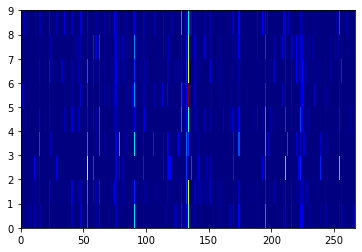

In [72]:
fig,ax = plt.subplots()
heatmap = ax.pcolormesh(cit_Gr_viz,cmap = plt.cm.jet,alpha=1)
fig.figure(figsize=(10,10))
ax.set_xticks(np.arange(cit_Gr_viz.shape[0])+12, minor=False)
ax.set_yticks(np.arange(cit_Gr_viz.shape[1])+12,minor=False)

ax.set_xticklabels(cit_Gr_viz.index,minor=False)
ax.set_yticklabels(cit_Gr_viz.columns,minor=False)
plt.show()

In [73]:
import seaborn as sns

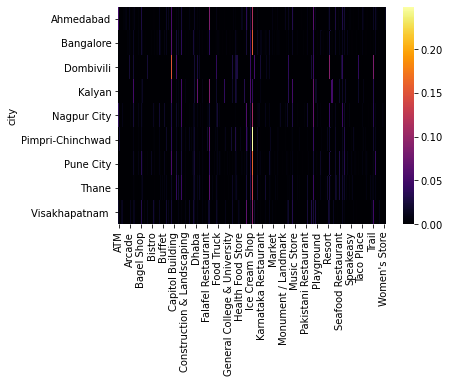

In [84]:
sns.heatmap(cit_Gr_viz,cmap=plt.cm.inferno)

In [87]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

E:\PythonStuff\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# clustering

In [88]:
ven_grouped_clusters = ven_grouped.drop('postal_code',axis=1)
ven_grouped_clusters.head()

,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.032258
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


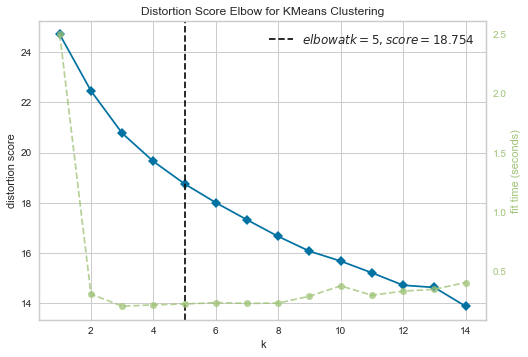

In [89]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,15))
visualizer.fit(ven_grouped_clusters)
visualizer.show()

so K=5 is the best number of clusters

In [90]:
# set number of clusters
kclusters = 5

#ven_grouped_clusters = ven_grouped.drop('postal_code',axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ven_grouped_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [91]:
kmeans.labels_

array([3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 1, 1, 3, 3, 3, 4, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 0, 4, 0, 3, 3,
       1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 4, 0, 4,
       0, 4, 1, 4, 4, 4, 3, 3, 3, 0, 3, 4, 1, 4, 3, 3, 4, 3, 3, 3, 4, 4,
       3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4,
       4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3,
       3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 3, 2, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3,
       3])

In [93]:
ven_sorted_clustered = ven_sorted.copy()
ven_sorted_clustered.insert(1,'cluster_labels',kmeans.labels_)
ven_sorted_clustered.head()

,postal_code,cluster_labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,380001,3,Indian Restaurant,Hotel,Historic Site,Fast Food Restaurant,Multiplex,Tea Room,Asian Restaurant,Ice Cream Shop,Motel,Park
1,380002,4,Indian Restaurant,Hotel,Fast Food Restaurant,Historic Site,Shopping Mall,Tea Room,Bus Station,Sports Club,Market,Snack Place
2,380004,4,Hotel,Indian Restaurant,Café,History Museum,Vegetarian / Vegan Restaurant,Arcade,Market,Tea Room,Dessert Shop,Athletics & Sports
3,380005,4,Sandwich Place,Hotel Bar,Indian Restaurant,Pizza Place,Snack Place,Cricket Ground,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Athletics & Sports,Arcade
4,380006,4,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Tea Room,Sandwich Place,Dessert Shop,Pizza Place,Coffee Shop,Park


In [94]:
cities_clustered = cities.join(ven_sorted_clustered.set_index('postal_code'),on = 'postal_code')
cities_clustered.head()

,postal_code,city,latitude,longitude,cluster_labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,380001,Ahmedabad,23.019812,72.593720,3.0,Indian Restaurant,Hotel,Historic Site,Fast Food Restaurant,Multiplex,Tea Room,Asian Restaurant,Ice Cream Shop,Motel,Park
1,380002,Ahmedabad,23.029919,72.595380,4.0,Indian Restaurant,Hotel,Fast Food Restaurant,Historic Site,Shopping Mall,Tea Room,Bus Station,Sports Club,Market,Snack Place
2,380004,Ahmedabad,23.047662,72.588780,4.0,Hotel,Indian Restaurant,Café,History Museum,Vegetarian / Vegan Restaurant,Arcade,Market,Tea Room,Dessert Shop,Athletics & Sports
3,380005,Ahmedabad,23.083748,72.591768,4.0,Sandwich Place,Hotel Bar,Indian Restaurant,Pizza Place,Snack Place,Cricket Ground,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Athletics & Sports,Arcade
4,380006,Ahmedabad,23.022584,72.567249,4.0,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Tea Room,Sandwich Place,Dessert Shop,Pizza Place,Coffee Shop,Park


In [95]:
def map_city(dataframe,location):
    map_city = folium.Map(location, zoom_start = 11)
    # add markers to map
    for lat, lng, post_code, city in zip(dataframe['latitude'], dataframe['longitude'],dataframe['postal_code'],dataframe['City']):
        label = '{}, {}'.format(post_code,city)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_city)  
    return map_city

In [113]:

def map_clusters(dataframe,location):
    # create map
    map_ = folium.Map(location, zoom_start=11)
    # set color scheme for the clusters
    x = np.arange(kclusters)
    ys = [i + x + (i*x)**2 for i in range(kclusters)]
    colors_array = cm.plasma(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]
    
    # add markers to the map
    markers_colors = []
    for lat, lon, poi, borough,cluster in zip(dataframe['latitude'], dataframe['longitude'],dataframe['postal_code'],dataframe['city'],dataframe['cluster_labels']):
        label = folium.Popup(str(poi)+' ' +str(borough) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_)    
    
    
    
    return map_
    

In [96]:
def get_cords(city_name):
    address = city_name
    geolocator = Nominatim(user_agent="toronto_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    cords = []
    cords.append(latitude)
    cords.append(longitude)
    return cords

In [97]:
ahmd = get_cords('Ahmedabad')
bglr = get_cords('Bangalore')
kdmc = get_cords('Kalyan-Dombivli')
ngpr = get_cords('Nagpur')
pmch = get_cords('Pimpri-Chinchwad')
pune = get_cords('Pune')
thne = get_cords('Thane')
viza = get_cords('Visakhapatnam')

In [108]:
cities_clustered[cities_clustered['cluster_labels'].isnull()==True]

,postal_code,city,latitude,longitude,cluster_labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
253,530031,Visakhapatnam,17.611406,83.179378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
cities_clustered_n = cities_clustered.drop(253,0)

In [114]:
map_clusters(cities_clustered_n,ahmd)

In [115]:
cities_clustered_n.head()

,postal_code,city,latitude,longitude,cluster_labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,380001,Ahmedabad,23.019812,72.593720,3.0,Indian Restaurant,Hotel,Historic Site,Fast Food Restaurant,Multiplex,Tea Room,Asian Restaurant,Ice Cream Shop,Motel,Park
1,380002,Ahmedabad,23.029919,72.595380,4.0,Indian Restaurant,Hotel,Fast Food Restaurant,Historic Site,Shopping Mall,Tea Room,Bus Station,Sports Club,Market,Snack Place
2,380004,Ahmedabad,23.047662,72.588780,4.0,Hotel,Indian Restaurant,Café,History Museum,Vegetarian / Vegan Restaurant,Arcade,Market,Tea Room,Dessert Shop,Athletics & Sports
3,380005,Ahmedabad,23.083748,72.591768,4.0,Sandwich Place,Hotel Bar,Indian Restaurant,Pizza Place,Snack Place,Cricket Ground,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Athletics & Sports,Arcade
4,380006,Ahmedabad,23.022584,72.567249,4.0,Indian Restaurant,Café,Hotel,Fast Food Restaurant,Tea Room,Sandwich Place,Dessert Shop,Pizza Place,Coffee Shop,Park


In [137]:
for label in cities_clustered_n['cluster_labels'].unique():
    temp = cities_clustered_n[cities_clustered_n['cluster_labels']==label]
    print("--------------------------------------"+str(int(label))+"--------------------------------------")
    temp_new = pd.DataFrame(temp['1st Most Common Venue'].value_counts())
    print(temp_new)
    print('\n')
    
    


--------------------------------------3--------------------------------------
                          1st Most Common Venue
Indian Restaurant                            88
Café                                          3
Maharashtrian Restaurant                      1
Fast Food Restaurant                          1
Dessert Shop                                  1
Motel                                         1
ATM                                           1
Boat or Ferry                                 1
Farmers Market                                1
Lake                                          1
Gourmet Shop                                  1
Hotel                                         1
Food Court                                    1
Bus Station                                   1
Lounge                                        1
Bakery                                        1


--------------------------------------4--------------------------------------
                         1

In [132]:
q = pd.DataFrame(temp['1st Most Common Venue'].value_counts())



,1st Most Common Venue
Hotel,3
Athletics & Sports,2


In [144]:
cl1_0 = cities_clustered_n[cities_clustered_n['cluster_labels']==0.0]['1st Most Common Venue'].value_counts()
cl1_1 = cities_clustered_n[cities_clustered_n['cluster_labels']==1.0]['1st Most Common Venue'].value_counts()
cl1_2 = cities_clustered_n[cities_clustered_n['cluster_labels']==2.0]['1st Most Common Venue'].value_counts()
cl1_3 = cities_clustered_n[cities_clustered_n['cluster_labels']==3.0]['1st Most Common Venue'].value_counts()
cl1_4 = cities_clustered_n[cities_clustered_n['cluster_labels']==4.0]['1st Most Common Venue'].value_counts()

In [154]:
#cl_0 = pd.DataFrame(cl1_0).reset_index()
cl_1 = pd.DataFrame(cl1_1).reset_index()
cl_2 = pd.DataFrame(cl1_2).reset_index()
cl_3 = pd.DataFrame(cl1_3).reset_index()
cl_4 = pd.DataFrame(cl1_4).reset_index()

In [191]:
cl_0.rename(columns={'index':'Venue Type','1st Most Common Venue':'count'},inplace=True)
cl_1.rename(columns={'index':'Venue Type','1st Most Common Venue':'count'},inplace=True)
cl_2.rename(columns={'index':'Venue Type','1st Most Common Venue':'count'},inplace=True)
cl_3.rename(columns={'index':'Venue Type','1st Most Common Venue':'count'},inplace=True)
cl_4.rename(columns={'index':'Venue Type','1st Most Common Venue':'count'},inplace=True)

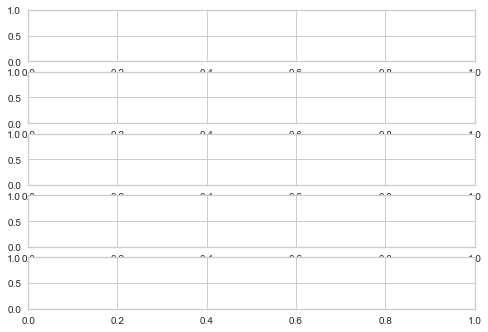

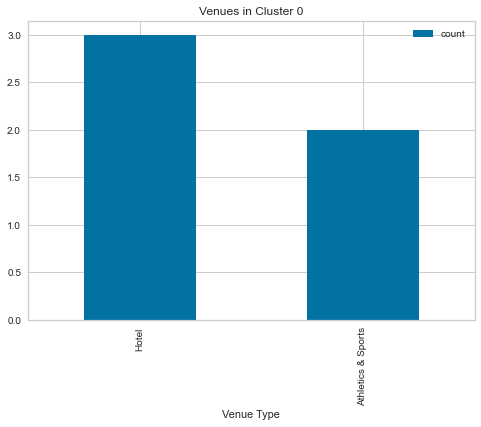

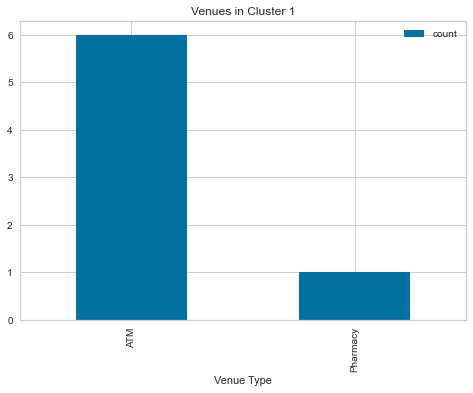

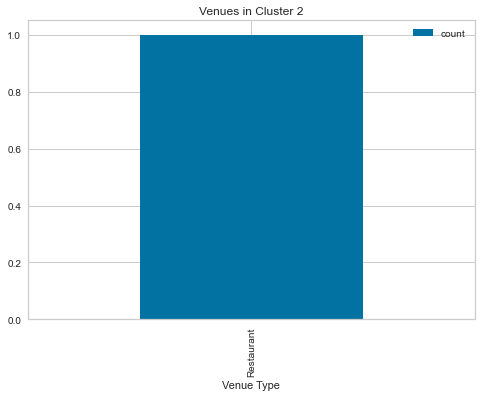

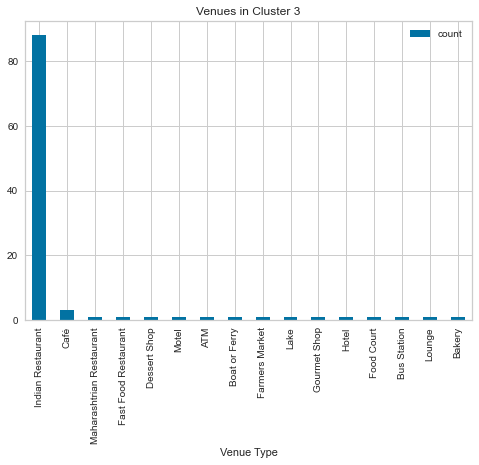

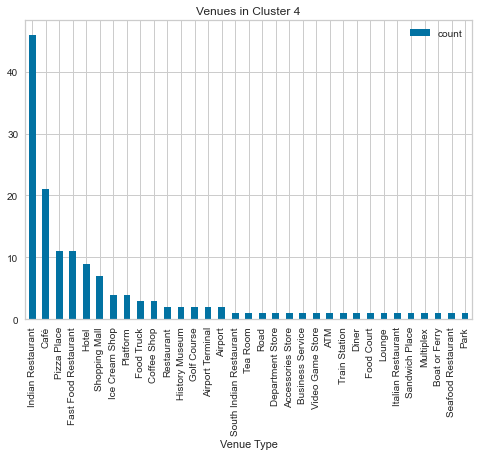

In [196]:
fig,(ax0,ax1,ax2,ax3,ax4)= plt.subplots(5)
#fig(figsize = (5,5))
x = np.arange(len(cl_0['Venue Type']))
width = 0.35
#ax0.bar(x-width/2,cl_0['1st Most Common Venue'],width,label='Cluster 0')
ax0 = cl_0.plot(kind= 'bar',x='Venue Type',y='count')
ax1 = cl_1.plot(kind= 'bar',x='Venue Type',y='count')
ax2 = cl_2.plot(kind= 'bar',x='Venue Type',y='count')
ax3 = cl_3.plot(kind= 'bar',x='Venue Type',y='count')
ax4 = cl_4.plot(kind= 'bar',x='Venue Type',y='count')

#ax0.set_xticks(np.arange(cl_0.shape[0])+0.5,minor=False)
ax0.set_title('Venues in Cluster 0')
ax1.set_title('Venues in Cluster 1')
ax2.set_title('Venues in Cluster 2')
ax3.set_title('Venues in Cluster 3')
ax4.set_title('Venues in Cluster 4')

#ax0.set_label('Businesses')
#fig.title('')
#fig(figsize=(10,10))
plt.show()

In [199]:
cities_clustered_n.sns(kind = 'pi','cluster_labels')

SyntaxError: positional argument follows keyword argument (<ipython-input-199-41ce274ba3f2>, line 1)

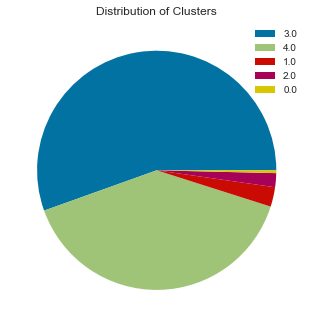

In [217]:
x = cities_clustered_n['cluster_labels'].value_counts()
labels = cities_clustered_n['cluster_labels'].unique()
plt.pie(x)
plt.title('Distribution of Clusters')
plt.legend(labels)
plt.show()

In [218]:
cities_clustered_n.to_csv('clustered_data.csv')

In [2]:
import pandas as pd
cities_clustered_n = pd.read_csv('clustered_data.csv')

In [3]:
cities_clustered_n['cluster_labels'].value_counts()

4.0    147
3.0    105
1.0      7
0.0      5
2.0      1
Name: cluster_labels, dtype: int64

In [ ]:
T

In [2]:
import pandas as pd
#import requests
#import json
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import matplotlib.pyplot as plt
import numpy as np
#from pandas.io.json import json_normalize 
import seaborn as sns
print('Libraries Imported')

Libraries Imported


Let's analyse crime

In [2]:
crime = pd.read_excel('Coursera_Capstone/The Battle of the Neighbourhoods/Crimes.xlsx')
crime.head()

,Year,Ahmedabad,Bengaluru_City,Kalyan-Dombivli,Nagpur,Pimpri-Chinchwad,Unnamed: 6,Thane,Visakhapatnam
0,2018,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,9786,53705.0,3563.0,8584.0,10645.0,NaN,15479.0,8942.0
2,2016,8415,49038.0,3412.0,9482.0,8195.0,19554.0,14574.0,9905.0
3,2015,8424,39627.0,3003.0,9720.0,7807.0,19332.0,17370.0,8613.0
4,2014,8733,35727.0,3447.0,9620.0,7869.0,22084.0,15767.0,7882.0


In [5]:
crime.rename(columns = {'Unnamed: 6':'Pune'},inplace=True)

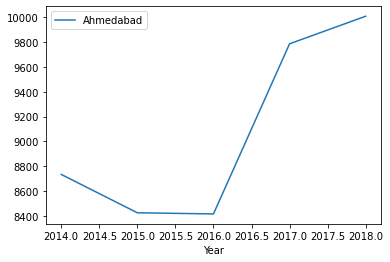

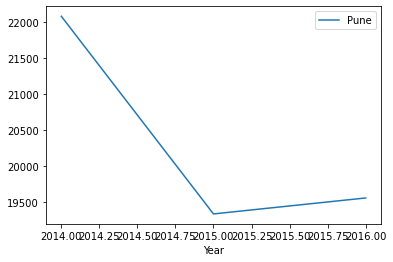

In [55]:
crime.plot(kind='line',x = 'Year',y = 'Ahmedabad')
crime.plot(kind='line',x = 'Year',y = 'Pune')

In [10]:
crimess = crime.set_index('Year')

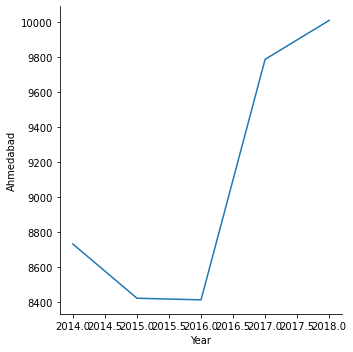

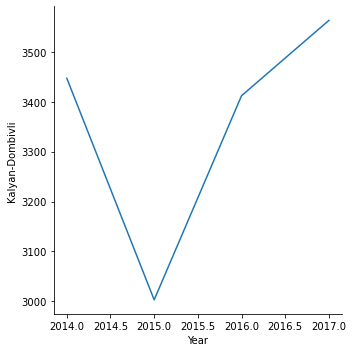

In [44]:
sns.relplot(x = 'Year',y='Ahmedabad',kind='line',data = crime)
sns.relplot(x = 'Year',y='Kalyan-Dombivli',kind='line',data = crime)


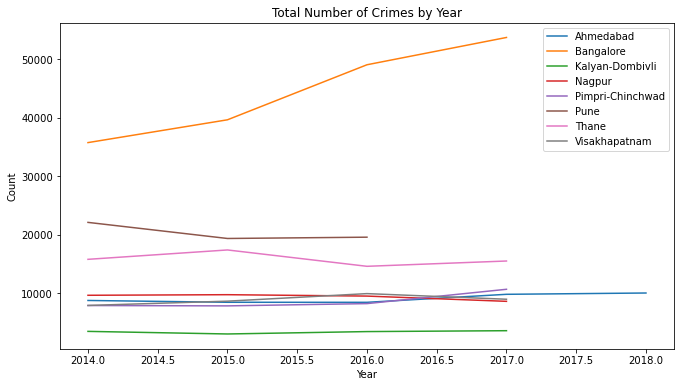

In [35]:
plt.figure(figsize=(11,6))
plt.plot(crime['Year'],crime['Ahmedabad'],label='Ahmedabad')
plt.plot(crime['Year'],crime['Bengaluru_City'],label='Bangalore')
plt.plot(crime['Year'],crime['Kalyan-Dombivli'],label='Kalyan-Dombivli')
plt.plot(crime['Year'],crime['Nagpur'],label='Nagpur')
plt.plot(crime['Year'],crime['Pimpri-Chinchwad'],label='Pimpri-Chinchwad')
plt.plot(crime['Year'],crime['Pune'],label='Pune')
plt.plot(crime['Year'],crime['Thane'],label='Thane')
plt.plot(crime['Year'],crime['Visakhapatnam'],label='Visakhapatnam')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Total Number of Crimes by Year')
plt.legend()


No handles with labels found to put in legend.


Figure(432x288)
Figure(720x432)


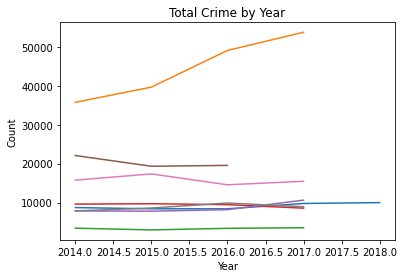

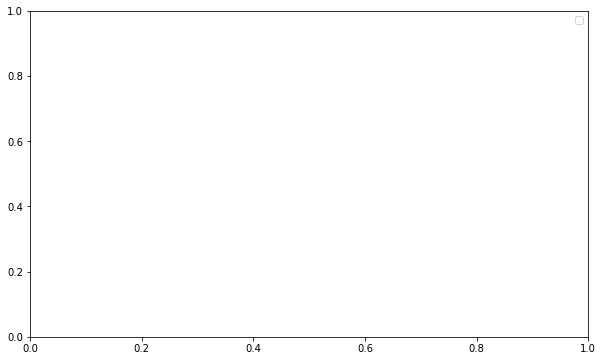

In [34]:
fig,ax = plt.subplots()
print(fig)
fig = plt.figure(figsize=(10,6))
print(fig)
ax.plot(crime['Year'],crime['Ahmedabad'],label='Ahmedabad')
ax.plot(crime['Year'],crime['Bengaluru_City'],label='Bangalore')
ax.plot(crime['Year'],crime['Kalyan-Dombivli'],label='Kalyan-Dombivli')
ax.plot(crime['Year'],crime['Nagpur'],label='Nagpur')
ax.plot(crime['Year'],crime['Pimpri-Chinchwad'],label='Pimpri-Chinchwad')
ax.plot(crime['Year'],crime['Pune'],label='Pune')
ax.plot(crime['Year'],crime['Thane'],label='Thane')
ax.plot(crime['Year'],crime['Visakhapatnam'],label='Visakhapatnam')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Total Crime by Year')

plt.legend()


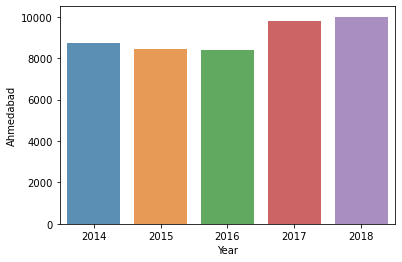

In [46]:
sns.barplot(x='Year',y='Ahmedabad',data=crime,alpha = 0.8)

In [47]:
educ = pd.read_excel('Coursera_Capstone/The Battle of the Neighbourhoods/Education.xlsx')
educ.head()

,Unnamed: 0,Vizag,Thane,Pune,PMCH,Nagpur,KDMC,Ahmedabad
0,2015,0,311551,506671,611,471158,163548,717636
1,2016,0,321792,514403,626,469418,166230,649087
2,2017,783456,324658,519492,650,461752,167687,618797


In [61]:
educ.rename(columns={'Unnamed: 0':'Year'},inplace=True)
educc = educ.set_index('Year')

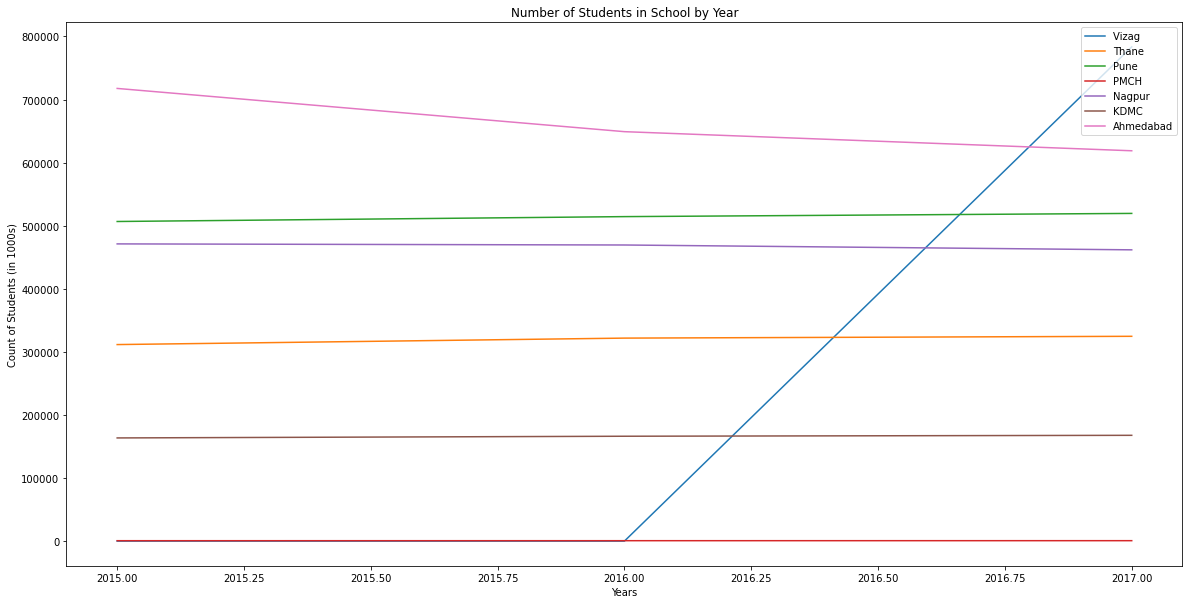

In [71]:
educc.plot(kind='line',
            
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Number of Students in School by Year')
plt.ylabel('Count of Students (in 1000s)')
plt.xlabel('Years')

plt.show()

In [66]:
gst = pd.read_excel('Coursera_Capstone/The Battle of the Neighbourhoods/gst.xlsx')
gst.head()

,Year,Kalyan-Dombivli,Nagpur,PMCH,Pune,Thane,Vizag
0,2017,8.075362,0.022695,1516.28,19.956074,12.254383,10.285662
1,2016,12.526885,0.022037,1209.67,36.468438,28.466503,17.518101
2,2015,8.683337,0.025398,1283.74,19.405689,20.932925,13.024613
3,2014,11.224030,0.013185,1039.36,27.326393,18.114964,11.885028


In [74]:
gstt = gst.set_index('Year')

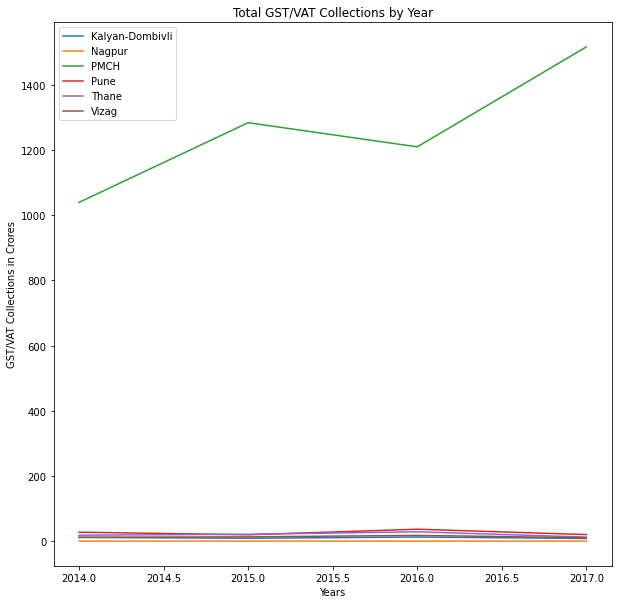

In [75]:
gstt.plot(kind='line',
            
             
             figsize=(10, 10), # pass a tuple (x, y) size
             )

plt.title('Total GST/VAT Collections by Year')
plt.ylabel('GST/VAT Collections in Crores')
plt.xlabel('Years')

plt.show()

In [3]:
health = pd.read_excel('Coursera_Capstone/The Battle of the Neighbourhoods/health_infra.xlsx')
health.head()

,City,Number of Beds in Emergency Wards,Number of Beds in facility type,Number of Doctors / Physicians,Number of Nurses,Number of Midwives Professional
0,KDMC,20,240,63,59,37
1,Ahmedabad,143,4475,1056,2437,22
2,Nagpur,1,40,31,48,29
3,Pune,0,17165,232,342,384


In [4]:
healtth = health.set_index('City')

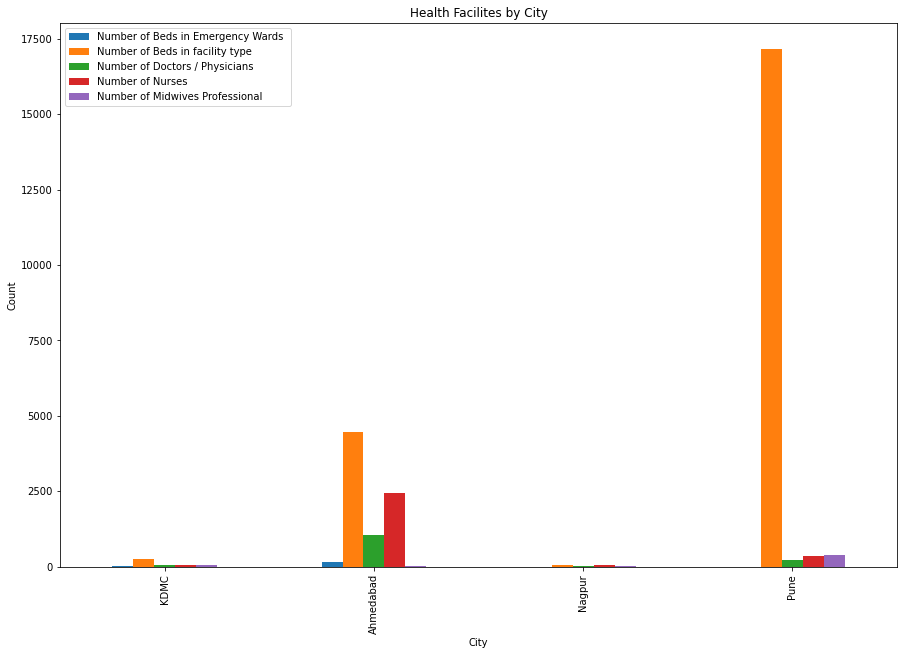

In [79]:
healtth.plot(kind = 'bar',
            figsize = (15,10)
            )

plt.title('Health Facilites by City')
plt.ylabel('Count')
plt.xlabel('City')

plt.show()

In [5]:
healtth.columns

Index(['Number of Beds in Emergency Wards ', 'Number of Beds in facility type',
       'Number of Doctors / Physicians', 'Number of Nurses',
       'Number of Midwives Professional '],
      dtype='object')

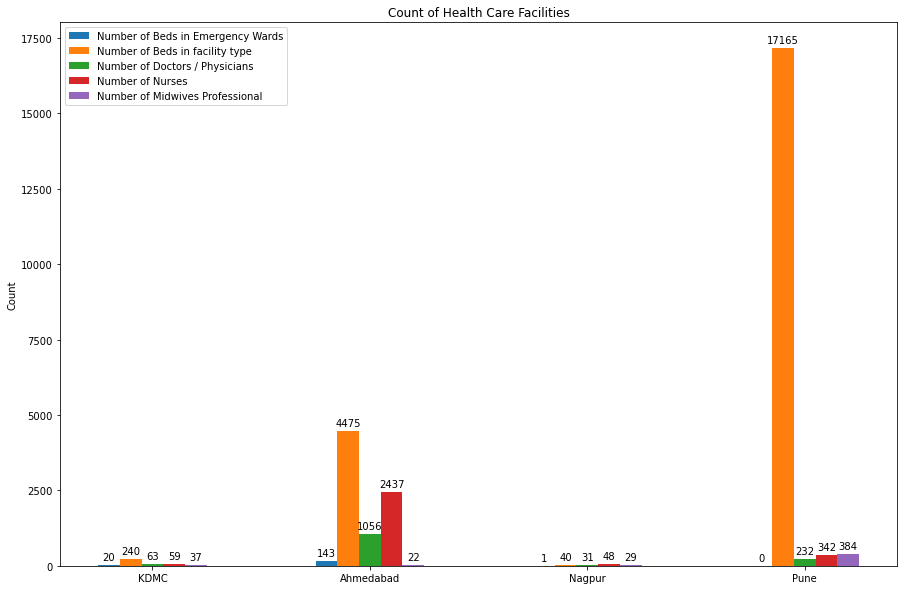

In [46]:
labels = healtth.index

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, healtth['Number of Beds in Emergency Wards '], width, label='Number of Beds in Emergency Wards')
rects2 = ax.bar(x - 0.1, healtth['Number of Beds in facility type'], width, label='Number of Beds in facility type')
rects3 = ax.bar(x, healtth['Number of Doctors / Physicians'], width, label='Number of Doctors / Physicians')
rects4 = ax.bar(x + 0.1, healtth['Number of Nurses'], width, label='Number of Nurses')
rects5 = ax.bar(x + 0.2, healtth['Number of Midwives Professional '], width, label='Number of Midwives Professional ')

                                     
                                     
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Count of Health Care Facilities')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
fig.set_size_inches(15,10)


plt.show()

In [67]:
hpi = pd.read_excel('Coursera_Capstone/The Battle of the Neighbourhoods/HPI.xlsx',sheet_name='Sheet3')
hpi

,Year,Ahmedabad (Rs/sqft),Bangalore (Rs/Sqft),Vizag (Rs/sqft),Thane (Rs/sqft),Nagpur (Rs/sqft),PMCH (Rs/sqft),KDMC (Rs/sqft),Pune (Rs/sqft)
0,2013,3181.00,5024.00,2818.333333,11790.00,4458.333333,4695.666667,6016.666667,5290.666667
1,2014,3142.75,5327.75,2862.000000,12362.50,4587.500000,4934.750000,6430.000000,5765.250000
2,2015,3187.00,5732.25,3066.250000,13715.75,4835.500000,5348.750000,7007.500000,6309.500000
3,2016,3222.00,6434.75,3520.500000,14391.75,5450.750000,5493.500000,7705.250000,6620.250000
4,2017,3403.00,6370.00,3916.000000,14190.75,5509.750000,5791.000000,7804.500000,7001.750000
5,2018,3731.00,6670.00,3973.000000,14763.00,5655.000000,5839.000000,8041.000000,7238.000000


In [54]:
sns.relplot(kind = 'line',data=hpi)

ValueError: These `style` levels are missing dashes: {'PMCH (Rs/sqft)', 'KDMC (Rs/sqft)'}

In [66]:
hpii = hpi.drop(5,0)

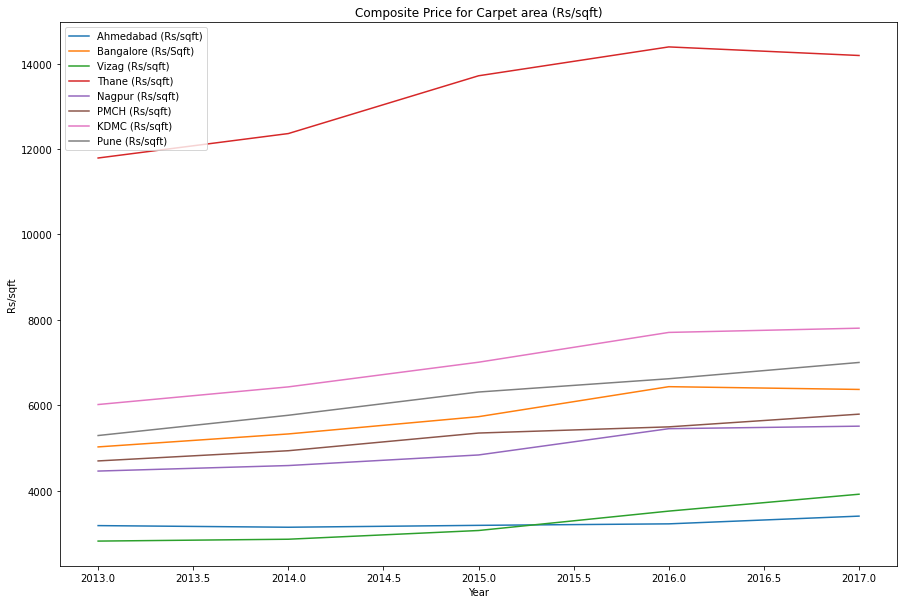

In [70]:
hpii.set_index('Year').plot(kind = 'line',
                            figsize = (15,10)
        
                           )
plt.title('Composite Price for Carpet area (Rs/sqft)')
plt.ylabel('Rs/sqft')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.show()